# TSI Prediction: SimpleRNN vs LSTM vs GRU Experiments

In [192]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy import stats
import statsmodels.api as sm

outputPath = 'C:\\Users\Ami\Dropbox\Tese\Monografia\Figuras\\'

# TSI 6 Hours: Varying Hidden Units

In [196]:
dfsimple1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_simple1.csv')
dflstm1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_lstm1.csv')
dfgru1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_gru1.csv')

dfsimple2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_simple2.csv')
dflstm2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_lstm2.csv')
dfgru2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_gru2.csv')

df_simple = np.concatenate((dfsimple1,dfsimple2))
df_lstm = np.concatenate((dflstm1,dflstm2))
df_gru = np.concatenate((dfgru1,dfgru2))

In [197]:
n_tests = 20 #number of tests for each setting
n_groups = int(df_simple.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = np.unique(df_simple[:,0]).astype(np.int32)
colors = ['orange', 'blue','green'] # boxplot's colors by type RNN
xLabel = 'Hidden Units'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'RNN Architectures: Hidden Units # Variation for TSI 6h Prediction'

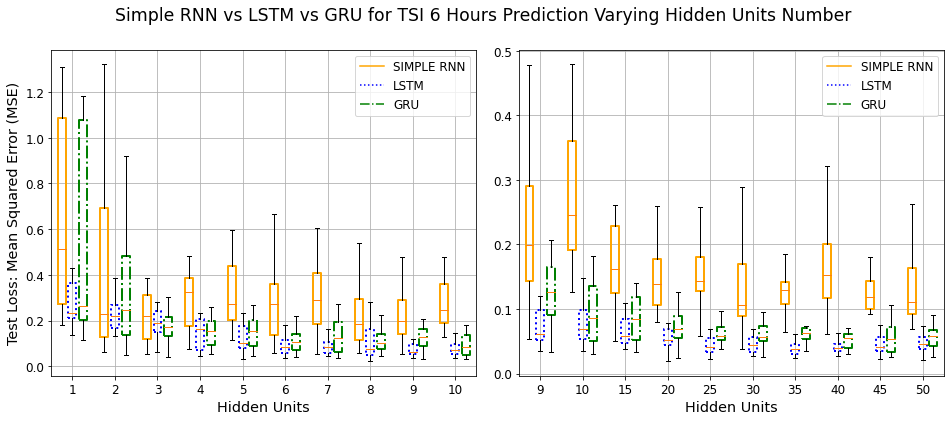

In [198]:
a = 1 #first boxplot initial position
b = 2
c = 3

# building base plot with: 17x8
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6)) 
fig.suptitle('Simple RNN vs LSTM vs GRU for TSI 6 Hours Prediction Varying Hidden Units Number',fontsize='xx-large')
fig.subplots_adjust(wspace=0.1)

#fig, ax = plt.subplots() 
groupA = 10
groupB = (n_groups-groupA)+2

for i in range(groupA):
    g1 = df_simple[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df_gru[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax1.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax1.plot([], c=colors[0], label='SIMPLE RNN', linestyle='-')    
ax1.plot([], c=colors[1], label='LSTM', linestyle=':')
ax1.plot([], c=colors[2], label='GRU', linestyle='-.')
ax1.tick_params(axis='x', labelsize='large' ) 
ax1.tick_params(axis='y', labelsize='large' ) 

ax1.legend(fontsize='large')
ax1.grid()

ax1.set_xticks(np.arange(2, groupA*4, 4))
ax1.set_xticklabels(groups[:groupA]) # repositioning labels batchsize
ax1.set_xlim(0,groupA*4)
ax1.set_xlabel(xLabel,fontsize='x-large')
ax1.set_ylabel(yLabel,fontsize='x-large')

a = 1 #first boxplot initial position
b = 2
c = 3
for i in range(8,n_groups):
    g1 = df_simple[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df_gru[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax2.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax2.plot([], c=colors[0], label='SIMPLE RNN', linestyle='-')    
ax2.plot([], c=colors[1], label='LSTM', linestyle=':')
ax2.plot([], c=colors[2], label='GRU', linestyle='-.')
ax2.tick_params(axis='x', labelsize='large' ) 
ax2.tick_params(axis='y', labelsize='large' ) 

ax2.legend(fontsize='large')
ax2.grid()

ax2.set_xticks(np.arange(2, groupB*4, 4))
ax2.set_xticklabels(groups[8:]) # repositioning labels batchsize
ax2.set_xlim(0,groupB*4)
ax2.set_xlabel(xLabel,fontsize='x-large')

plt.savefig(outputPath+'TSI6H_SimplexLSTMxGRU_HU.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

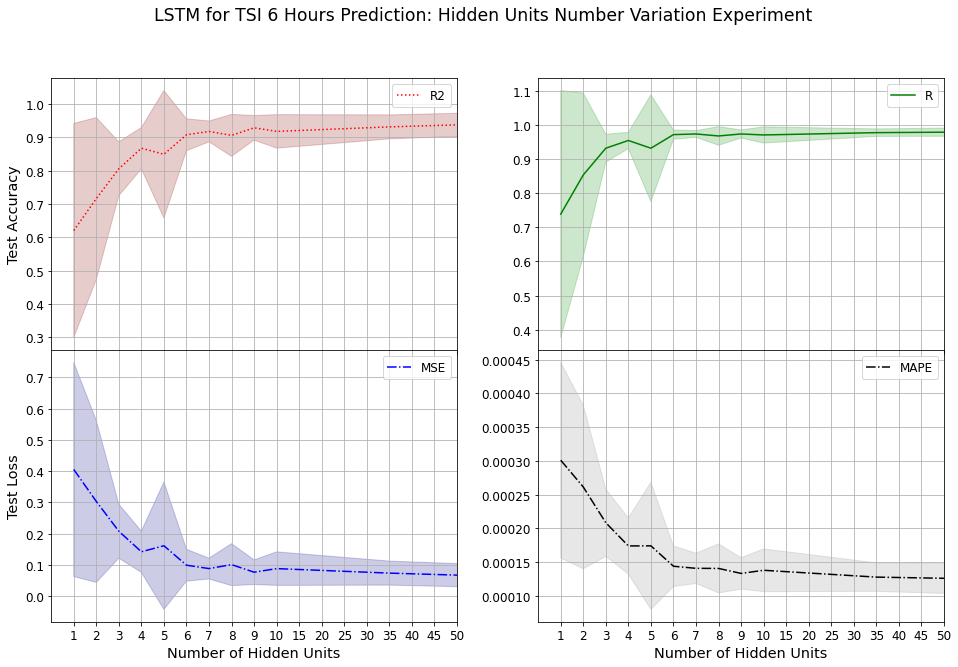

In [199]:
df1 = np.asarray(df_lstm)
# error = np.asarray(error)

n_tests = 20 #number of tests for each setting
n_groups = int(df1.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = np.unique(df1[:, 0]).astype(np.int32) # Each group label
# groups = unitsNumbers
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN

R2MeansStds = [] # R2
RMeansStds = [] # R
MSEMeansStds = [] # MSE
MAPEMeansStds = [] # MAPE

# ValLossMeansStds = [] # Validation Loss

for i in range(n_groups):
    R2MeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 1]), np.std(df1[intervals[i]:intervals[i]+n_tests, 1])])
    RMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 2]), np.std(df1[intervals[i]:intervals[i]+n_tests, 2])])
    MSEMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 3]), np.std(df1[intervals[i]:intervals[i]+n_tests, 3])])
    MAPEMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 4]), np.std(df1[intervals[i]:intervals[i]+n_tests, 4])])
#     ValLossMeansStds.append([np.mean(error[intervals[i]:intervals[i]+n_tests, 1]), np.std(error[intervals[i]:intervals[i]+n_tests, 1])])

R2MeansStds = np.asarray(R2MeansStds)
RMeansStds = np.asarray(RMeansStds)
MSEMeansStds = np.asarray(MSEMeansStds)
MAPEMeansStds = np.asarray(MAPEMeansStds)
# ValLossMeansStds = np.asarray(ValLossMeansStds)

fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(16,10))

fig.subplots_adjust(wspace=0.2,hspace=0)

plt.suptitle('LSTM for TSI 6 Hours Prediction: Hidden Units Number Variation Experiment',fontsize='xx-large')

ax1.plot(groups, R2MeansStds[:,0], c=colors[0], label='R2', linestyle=':')
ax1.fill_between(groups, R2MeansStds[:,0] - R2MeansStds[:,1], R2MeansStds[:,0] + R2MeansStds[:,1], color='#880000', alpha=0.2)

ax2.plot(groups, RMeansStds[:,0], c=colors[1], label='R', linestyle='-')
ax2.fill_between(groups, RMeansStds[:,0] - RMeansStds[:,1], RMeansStds[:,0] + RMeansStds[:,1], color='#008800', alpha=0.2)

ax3.plot(groups, MSEMeansStds[:,0], c=colors[2], label='MSE', linestyle='-.')
ax3.fill_between(groups, MSEMeansStds[:,0] - MSEMeansStds[:,1], MSEMeansStds[:,0] + MSEMeansStds[:,1], color='#000088', alpha=0.2)

ax4.plot(groups, MAPEMeansStds[:,0], c=colors[3], label='MAPE', linestyle='-.')
ax4.fill_between(groups, MAPEMeansStds[:,0] - MAPEMeansStds[:,1], MAPEMeansStds[:,0] + MAPEMeansStds[:,1], color='#888888', alpha=0.2)

# ax2.plot(groups, ValLossMeansStds[:,0], c=colors[3], label='Val Loss', linestyle='-.')
# ax2.fill_between(groups, ValLossMeansStds[:,0] - ValLossMeansStds[:,1], ValLossMeansStds[:,0] + ValLossMeansStds[:,1], color='#888888', alpha=0.2)

ax1.legend(fontsize='large')
ax2.legend(fontsize='large')
ax3.legend(fontsize='large')
ax4.legend(fontsize='large')

ax1.tick_params(axis='x', labelsize='large' ) 
ax1.tick_params(axis='y', labelsize='large' ) 
ax2.tick_params(axis='x', labelsize='large' ) 
ax2.tick_params(axis='y', labelsize='large' ) 
ax3.tick_params(axis='x', labelsize='large' ) 
ax3.tick_params(axis='y', labelsize='large' ) 
ax4.tick_params(axis='x', labelsize='large' ) 
ax4.tick_params(axis='y', labelsize='large' ) 

ax3.set_xlabel('Number of Hidden Units',fontsize='x-large')
ax4.set_xlabel('Number of Hidden Units',fontsize='x-large')

ax1.set_ylabel('Test Accuracy',fontsize='x-large')
ax3.set_ylabel('Test Loss',fontsize='x-large')

ax1.set_xticks(np.arange(1,n_groups+1,1))
ax1.set_xticklabels(groups) # repositioning labels batchsize
ax1.set_xlim(0,n_groups)
ax1.grid()

ax2.set_xticks(np.arange(1,n_groups+1,1))
ax2.set_xticklabels(groups) # repositioning labels batchsize
ax2.set_xlim(0,n_groups)
ax2.grid()

ax3.set_xticks(np.arange(1,n_groups+1,1))
ax3.set_xticklabels(groups) # repositioning labels batchsize
ax3.set_xlim(0,n_groups)
ax3.grid()

ax4.set_xticks(np.arange(1,n_groups+1,1))
ax4.set_xticklabels(groups) # repositioning labels batchsize
ax4.set_xlim(0,n_groups)
ax4.grid()
# ax1.set_title('R Score')
# ax2.set_title('Correlation Coeficient')
# ax3.set_title('Mean Squared Error')
# ax4.set_title('Mean Absolute Percentage Error')

plt.savefig(outputPath+'TSI6H_LSTM_HU.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)
plt.show()

In [200]:
print(n_groups)
print(groups)
print(MSEMeansStds.shape)
print(MAPEMeansStds.shape)
print(RMeansStds.shape)
print(R2MeansStds.shape)

18
[ 1  2  3  4  5  6  7  8  9 10 15 20 25 30 35 40 45 50]
(18, 2)
(18, 2)
(18, 2)
(18, 2)


In [201]:
MSEMeansStds

array([[0.40550016, 0.34298061],
       [0.30317196, 0.25941058],
       [0.20767867, 0.08633314],
       [0.14192231, 0.06618555],
       [0.16117763, 0.20394421],
       [0.09888105, 0.05111355],
       [0.088102  , 0.0333402 ],
       [0.10079581, 0.067204  ],
       [0.07651528, 0.0393843 ],
       [0.08800417, 0.05368598],
       [0.07358968, 0.03846718],
       [0.06281025, 0.03605836],
       [0.04875397, 0.02308695],
       [0.04892758, 0.02222636],
       [0.03922605, 0.01047011],
       [0.04116068, 0.0096704 ],
       [0.04736993, 0.01871509],
       [0.04918724, 0.02018328]])

In [202]:
df_lstm2 = df_lstm[40:,:]
df_gru2 = df_gru[40:,:]
n_tests = 20 #number of tests for each setting
n_groups = int(df_lstm2.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = np.unique(df_lstm2[:,0]).astype(np.int32)
colors = ['blue','green'] # boxplot's colors by type RNN
xLabel = 'Hidden Units'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'RNN Architectures: Hidden Units # Variation for TSI 6h Prediction'

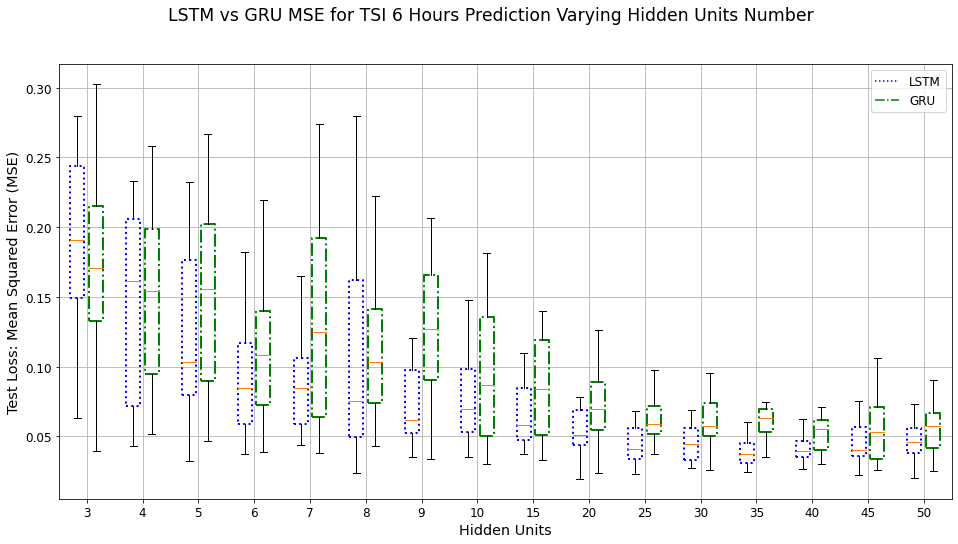

In [203]:
a = 1 #first boxplot initial position
b = 2

# building base plot with: 17x8
fig, axs = plt.subplots(figsize=(16, 8)) 
fig.suptitle('LSTM vs GRU MSE for TSI 6 Hours Prediction Varying Hidden Units Number',fontsize='xx-large')
# fig.subplots_adjust(wspace=0.1)
#fig, ax = plt.subplots() 
axs.tick_params(axis='x', labelsize='large' ) 
axs.tick_params(axis='y', labelsize='large' ) 

for i in range(n_groups):
    g1 = df_lstm2[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df_gru2[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    boxes = plt.boxplot([g1,g2], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = b+2
    b = a+1


plt.plot([], c=colors[0], label='LSTM', linestyle=':')
plt.plot([], c=colors[1], label='GRU', linestyle='-.')

plt.legend(fontsize='large')
plt.grid()

plt.xticks(np.arange(1.5, n_groups*3, 3),groups,fontsize='large') # repositioning labels batchsize
plt.yticks(fontsize='large')
plt.xlim(0,n_groups*3)
plt.xlabel(xLabel,fontsize='x-large')
plt.ylabel(yLabel,fontsize='x-large')

plt.savefig(outputPath+'TSI6H_LSTMxGRU_HU.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

In [204]:
n_tests = 20 #number of tests for each setting
n_groups = int(df_lstm2.shape[0]/n_tests) #number of groups
n_groups1 = int(n_groups/2)
intervals1 = range(0, n_groups1*n_tests, n_tests) #index intervals for each group of values
intervals2 = range(n_groups1*n_tests, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = np.unique(df_lstm2[:,0]).astype(np.int32)
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN
# xLabel = 'Hidden Units'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'LSTM X GRU: Hidden Units Variation for TSI 6h Prediction'
plot_opts={'cutoff':False, 'cutoff_type':'std', 'label_fontsize':'small',
           'label_rotation':0, 'violin_fc':(0.5, 0.5, 0.5),
           'jitter_marker':'.', 'jitter_marker_size':3, 'bean_color':'#FF6F00',
           'bean_mean_color':'#009D91'}

In [205]:
g1 = df_lstm2[intervals1[0]:intervals1[0]+n_tests, 3] #values for the i-th group 
g2 = df_gru2[intervals1[0]:intervals1[0]+n_tests, 3] #values for the i-th group 

for i in range(1,n_groups1):
    g1 = np.c_[g1,df_lstm2[intervals1[i]:intervals1[i]+n_tests, 3]] #values for the i-th group 
    g2 = np.c_[g2,df_gru2[intervals1[i]:intervals1[i]+n_tests, 3]] #values for the i-th group 

g3= df_lstm2[intervals2[0]:intervals2[0]+n_tests, 3] #values for the i-th group 
g4= df_gru2[intervals2[0]:intervals2[0]+n_tests, 3] #values for the i-th group 

for i in range(1,n_groups1):
    g3= np.c_[g3,df_lstm2[intervals2[i]:intervals2[i]+n_tests, 3]] #values for the i-th group 
    g4= np.c_[g4,df_gru2[intervals2[i]:intervals2[i]+n_tests, 3]] #values for the i-th group 

In [206]:
print(np.min([np.min(g1),np.min(g2),np.min(g3),np.min(g4)]))
print(np.max([np.max(g1),np.max(g2),np.max(g3),np.max(g4)]))

0.019418918923498313
1.0161672689946384


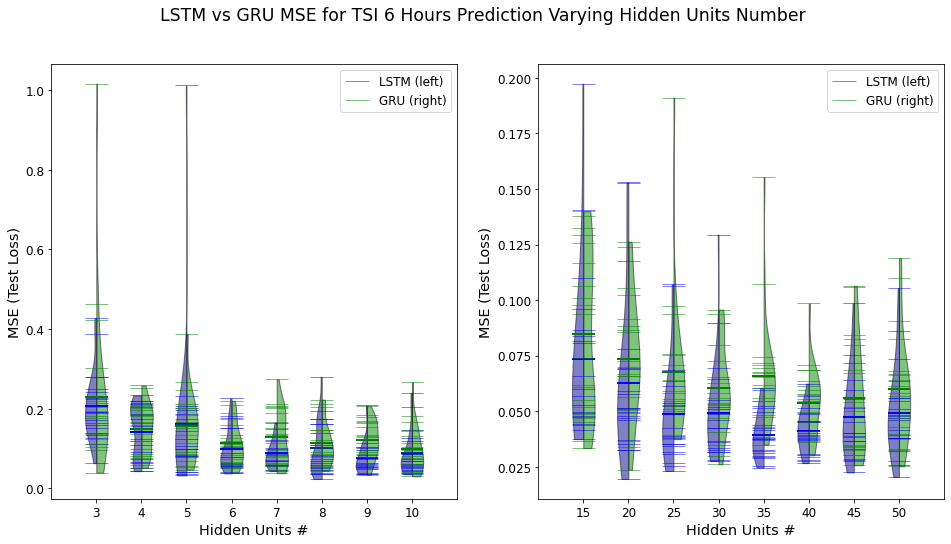

In [210]:
#np.seterr(divide='ignore', invalid='ignore')
# n_groups=4
# groups = [6,12,18,24,48,72]
# groups = groups[:n_groups]
# labels = ['Min_Max [-1,1]','Min_Max [0,1]','Standard']
columns = groups[:8]
lstm_data = pd.DataFrame(g1, columns = columns)
gru_data = pd.DataFrame(g2, columns = columns)
gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]


fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,8))
#fig.subplots_adjust(wspace=0)
ax = ax1

plot_opts['violin_fc'] = ('#000088')
#plot_opts['violin_fc'] = (0.7,0,0)
plot_opts['violin_width'] = 0.5
plot_opts['bean_show_mean'] = True
plot_opts['bean_show_median'] = False
plot_opts['bean_color'] = 'blue'
plot_opts['bean_mean_color'] = 'blue' 
plot_opts['bean_legend_text'] = 'LSTM (left)'
plot_opts['showfliers'] = False
plot_opts['cutoff_val'] = 0.
plot_opts['bw_factor'] = 0.5
#plot_opts['cutoff_val'] = 10
sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

plot_opts['violin_fc'] = ('#008800')
plot_opts['bean_color'] = 'green'
plot_opts['bean_mean_color'] = 'green' 
plot_opts['bean_legend_text'] = 'GRU (right)'
plot_opts['showfliers'] = False
plot_opts['cutoff_val'] = 0.
plot_opts['bw_factor'] = 0.5
sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

ax1.tick_params(axis='x', labelsize='large' ) 
ax1.tick_params(axis='y', labelsize='large' ) 

ax1.set_ylabel('MSE (Test Loss)', fontsize='x-large')
ax1.set_xlabel('Hidden Units #', fontsize='x-large')

ax1.set_xticks(np.arange(1,n_groups1+1,1))
ax1.set_xticklabels(columns) # repositioning ticks
ax1.set_xlim(0,n_groups1+1)
ax1.legend(fontsize='large')

ax = ax2

columns = groups[8:]
lstm_data = pd.DataFrame(g3, columns = columns)
gru_data = pd.DataFrame(g4, columns = columns)
gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]

plot_opts['violin_fc'] = ('#000088')
#plot_opts['violin_fc'] = (0.7,0,0)
plot_opts['violin_width'] = 0.5
plot_opts['bean_show_mean'] = True
plot_opts['bean_show_median'] = False
plot_opts['bean_color'] = 'blue'
plot_opts['bean_mean_color'] = 'blue' 
plot_opts['bean_legend_text'] = 'LSTM (left)'
plot_opts['showfliers'] = False
plot_opts['cutoff_val'] = 0.
plot_opts['bw_factor'] = 0.5
#plot_opts['cutoff_val'] = 10
sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

plot_opts['violin_fc'] = ('#008800')
plot_opts['bean_color'] = 'green'
plot_opts['bean_mean_color'] = 'green' 
plot_opts['bean_legend_text'] = 'GRU (right)'
plot_opts['showfliers'] = False
plot_opts['cutoff_val'] = 0.
plot_opts['bw_factor'] = 0.5
sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

ax2.tick_params(axis='x', labelsize='large' ) 
ax2.tick_params(axis='y', labelsize='large' ) 

ax2.set_ylabel('MSE (Test Loss)', fontsize='x-large')
ax2.set_xlabel('Hidden Units #', fontsize='x-large')
ax2.set_xticks(np.arange(1,n_groups1+1,1))
ax2.set_xticklabels(columns) # repositioning ticks
ax2.set_xlim(0,n_groups1+1)
ax2.legend(fontsize='large')
fig.suptitle('LSTM vs GRU MSE for TSI 6 Hours Prediction Varying Hidden Units Number',fontsize='xx-large')

plt.savefig(outputPath+'TSI6H_LSTMxGRU_HUViolin.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

In [47]:
x=np.arange(1,n_groups1+1,1)
print(x.shape)
print(columns.shape)

(8,)
(8,)


# TSI 6 Hours: Varying Batch Size

In [161]:
dfsimple1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_simpleBS.csv')
dflstm1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_lstmBS.csv')
dfgru1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_gruBS.csv')

dfsimple2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_simpleBS2.csv')
dflstm2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_lstmBS2.csv')
dfgru2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_gruBS2.csv')

df_simple = np.concatenate((dfsimple1,dfsimple2))
df_lstm = np.concatenate((dflstm1,dflstm2))
df_gru = np.concatenate((dfgru1,dfgru2))

In [162]:
n_tests = 20 #number of tests for each setting
n_groups = int(df_simple.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = [int(np.ceil(df_simple[i,0].astype(np.int32)/1320*100)) for i in range(0,df_simple.shape[0],20)]

colors = ['orange', 'blue','green'] # boxplot's colors by type RNN
xLabel = 'Batch Size (% of 1320 Training Samples)'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'RNN Architectures: Batch Size Variation for TSI 6h Prediction'

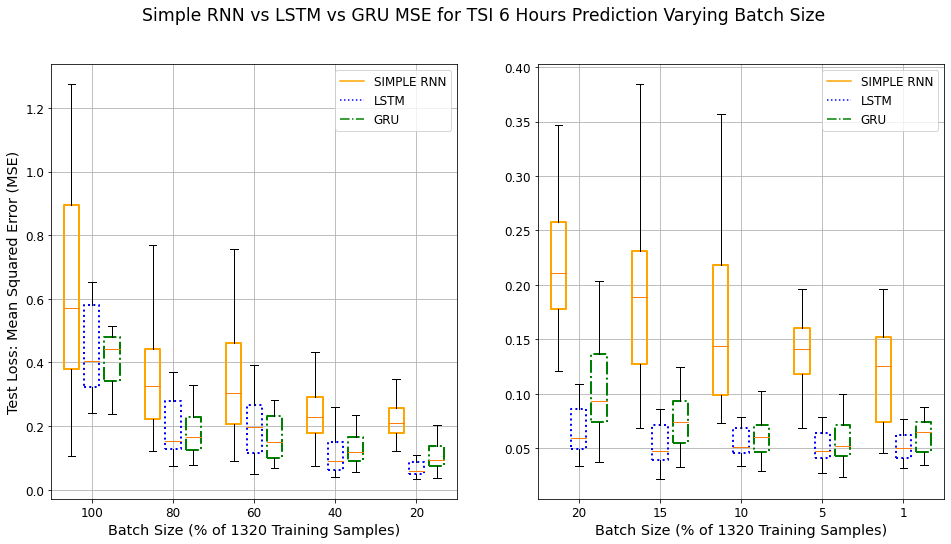

In [163]:
a = 1 #first boxplot initial position
b = 2
c = 3

# building base plot with: 17x8
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 8)) 
fig.suptitle('Simple RNN vs LSTM vs GRU MSE for TSI 6 Hours Prediction Varying Batch Size',fontsize='xx-large')
ax1.tick_params(axis='x', labelsize='large' ) 
ax1.tick_params(axis='y', labelsize='large' ) 

groupA = 5
groupB = (n_groups-groupA)+1

for i in range(groupA):
    g1 = df_simple[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df_gru[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax1.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax1.plot([], c=colors[0], label='SIMPLE RNN', linestyle='-')    
ax1.plot([], c=colors[1], label='LSTM', linestyle=':')
ax1.plot([], c=colors[2], label='GRU', linestyle='-.')

ax1.legend(fontsize='large')
ax1.grid()

ax1.set_xticks(np.arange(2, groupA*4, 4))
ax1.set_xticklabels(groups[:groupA]) # repositioning labels batchsize
ax1.set_xlim(0,groupA*4)
ax1.set_xlabel(xLabel,fontsize='x-large')
ax1.set_ylabel(yLabel,fontsize='x-large')


ax2.tick_params(axis='x', labelsize='large' ) 
ax2.tick_params(axis='y', labelsize='large' ) 

a = 1 #first boxplot initial position
b = 2
c = 3
for i in range(4,n_groups):
    g1 = df_simple[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df_gru[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax2.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax2.plot([], c=colors[0], label='SIMPLE RNN', linestyle='-')    
ax2.plot([], c=colors[1], label='LSTM', linestyle=':')
ax2.plot([], c=colors[2], label='GRU', linestyle='-.')
ax2.tick_params(axis='x', labelsize='large' ) 
ax2.tick_params(axis='y', labelsize='large' ) 

ax2.legend(fontsize='large')
ax2.grid()

ax2.set_xticks(np.arange(2, groupB*4, 4))
ax2.set_xticklabels(groups[4:]) # repositioning labels batchsize
ax2.set_xlim(0,groupB*4)
ax2.set_xlabel(xLabel,fontsize='x-large')

plt.savefig(outputPath+'TSI6H_SimplexLSTMxGRU_BS.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

In [164]:
df_lstm2 = df_lstm[60:,:]
df_gru2 = df_gru[60:,:]
n_tests = 20 #number of tests for each setting
n_groups = int(df_lstm2.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = groups[3:]
colors = ['blue','green'] # boxplot's colors by type RNN

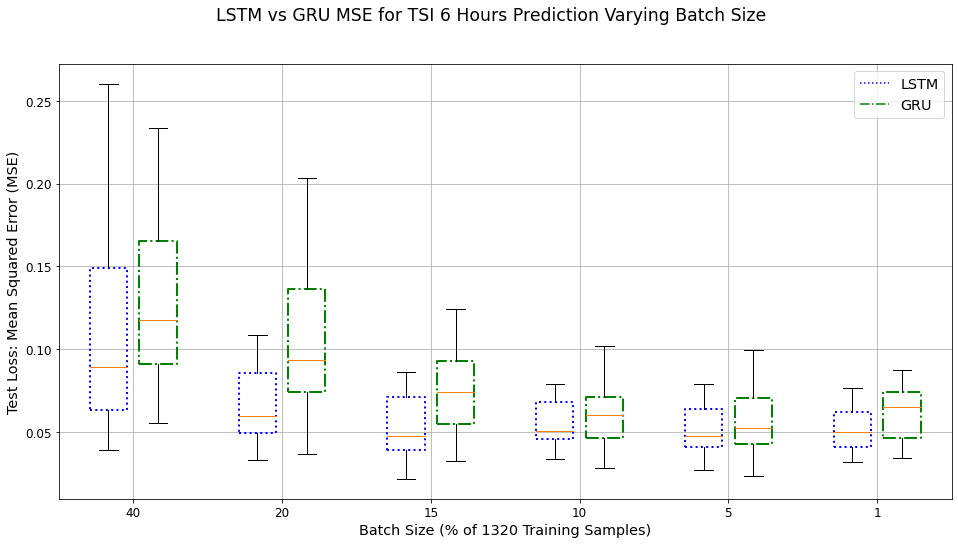

In [165]:
a = 1 #first boxplot initial position
b = 2

# building base plot with: 17x8
fig, axs = plt.subplots(figsize=(16, 8)) 
fig.suptitle('LSTM vs GRU MSE for TSI 6 Hours Prediction Varying Batch Size',fontsize='xx-large')
# fig.subplots_adjust(wspace=0.1)
#fig, ax = plt.subplots() 
axs.tick_params(axis='x', labelsize='large' ) 
axs.tick_params(axis='y', labelsize='large' ) 

for i in range(n_groups):
    g1 = df_lstm2[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df_gru2[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    boxes = plt.boxplot([g1,g2], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = b+2
    b = a+1


plt.plot([], c=colors[0], label='LSTM', linestyle=':')
plt.plot([], c=colors[1], label='GRU', linestyle='-.')

plt.legend(fontsize='x-large')

plt.grid()

plt.xticks(np.arange(1.5, n_groups*3, 3),groups,fontsize='large') # repositioning labels batchsize
plt.xlim(0,n_groups*3)
plt.xlabel(xLabel,fontsize='x-large')
plt.ylabel(yLabel,fontsize='x-large')

plt.savefig(outputPath+'TSI6H_LSTMxGRU_BS.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

# TSI: Varying Prediction Interval

In [101]:
dfsimple6h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Six HoursExp_simple.csv')
dflstm6h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Six HoursExp_lstm.csv')
dfgru6h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Six HoursExp_gru.csv')

dfsimple12h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Twelve HoursExp_simple.csv')
dflstm12h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Twelve HoursExp_lstm.csv')
dfgru12h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Twelve HoursExp_gru.csv')

dfsimple18h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Eighteen HoursExp_simple.csv')
dflstm18h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Eighteen HoursExp_lstm.csv')
dfgru18h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Eighteen HoursExp_gru.csv')

dfsimple24h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Twenty Four HoursExp_simple.csv')
dflstm24h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Twenty Four HoursExp_lstm.csv')
dfgru24h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Twenty Four HoursExp_gru.csv')

dfsimple48h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Forty Eight HoursExp_simple.csv')
dflstm48h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Forty Eight HoursExp_lstm.csv')
dfgru48h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Forty Eight HoursExp_gru.csv')

dfsimple72h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Seventy Two HoursExp_simple.csv')
dflstm72h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Seventy Two HoursExp_lstm.csv')
dfgru72h = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6TO72hours\\Seventy Two HoursExp_gru.csv')


df_simple = np.concatenate((dfsimple6h,dfsimple12h,dfsimple18h,dfsimple24h,dfsimple48h,dfsimple72h))
df_lstm = np.concatenate((dflstm6h,dflstm12h,dflstm18h,dflstm24h,dflstm48h,dflstm72h))
df_gru = np.concatenate((dfgru6h,dfgru12h,dfgru18h,dfgru24h,dfgru48h,dfgru72h))

In [102]:
n_tests = 20 #number of tests for each setting
n_groups = int(df_simple.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = [6, 12, 18, 24, 48, 72]

colors = ['orange', 'blue','green'] # boxplot's colors by type RNN
xLabel = 'Prediction Interval (Hours)'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'RNN Architectures: Varying Prediction Interval for TSI'

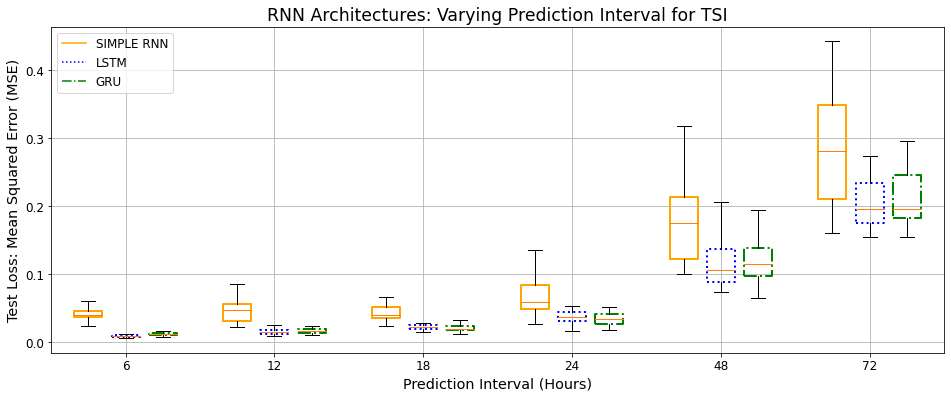

In [103]:
a = 1 #first boxplot initial position
b = 2
c = 3

# building base plot with: 17x8
fig, axs = plt.subplots(figsize=(16, 6)) 
# fig.suptitle(title,fontsize='xx-large')
# fig.subplots_adjust(wspace=0.1)

for i in range(n_groups):
    g1 = df_simple[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df_gru[intervals[i]:intervals[i]+n_tests, 3]
    boxes = plt.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

plt.plot([], c=colors[0], label='SIMPLE RNN', linestyle='-')    
plt.plot([], c=colors[1], label='LSTM', linestyle=':')
plt.plot([], c=colors[2], label='GRU', linestyle='-.')
plt.tick_params(axis='x', labelsize='large' ) 
plt.tick_params(axis='y', labelsize='large' ) 

plt.legend(fontsize='large')
plt.grid()

plt.xticks(np.arange(2, n_groups*4, 4),groups) # repositioning labels batchsize
plt.xlim(0,n_groups*4)
plt.xlabel(xLabel,fontsize='x-large')
plt.ylabel(yLabel,fontsize='x-large')
plt.title(title,fontsize='xx-large')

plt.savefig(outputPath+'TSI_SimplexLSTMxGRU_PI.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

In [104]:
n_tests = 20 #number of tests for each setting
n_groups = int(df_lstm.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = [6, 12, 18, 24, 48, 72]
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN
# xLabel = 'Hidden Units'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'LSTM X GRU: TSI 6 to 72 Hours Prediction'
plot_opts={'cutoff':False, 'cutoff_type':'std', 'label_fontsize':'small',
           'label_rotation':0, 'violin_fc':(0.5, 0.5, 0.5),
           'jitter_marker':'.', 'jitter_marker_size':3, 'bean_color':'#FF6F00',
           'bean_mean_color':'#009D91'}

In [105]:
g1 = df_lstm[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
g2 = df_gru[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 

for i in range(1,n_groups):
    g1 = np.c_[g1,df_lstm[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 
    g2 = np.c_[g2,df_gru[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 


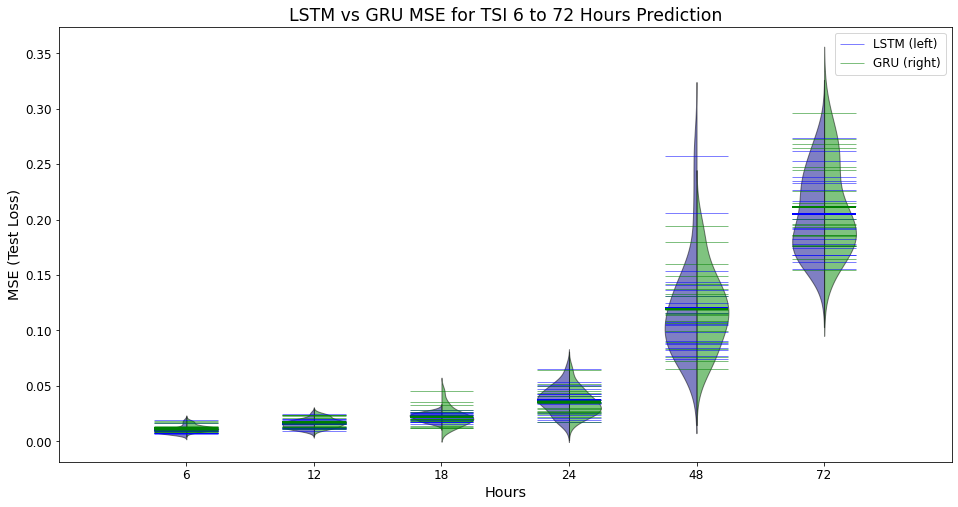

In [106]:
#np.seterr(divide='ignore', invalid='ignore')
# n_groups=4
# groups = [6,12,18,24,48,72]
# groups = groups[:n_groups]
# labels = ['Min_Max [-1,1]','Min_Max [0,1]','Standard']
columns = groups
lstm_data = pd.DataFrame(g1, columns = columns)
gru_data = pd.DataFrame(g2, columns = columns)
gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]

fig, ax = plt.subplots(figsize=(16,8))

plot_opts['violin_fc'] = ('#000088')
#plot_opts['violin_fc'] = (0.7,0,0)
plot_opts['violin_width'] = 0.5
plot_opts['bean_show_mean'] = True
plot_opts['bean_show_median'] = False
plot_opts['bean_color'] = 'blue'
plot_opts['bean_mean_color'] = 'blue' 
plot_opts['bean_legend_text'] = 'LSTM (left)'
#plot_opts['cutoff_val'] = 10
sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

plot_opts['violin_fc'] = ('#008800')
plot_opts['bean_color'] = 'green'
plot_opts['bean_mean_color'] = 'green' 
plot_opts['bean_legend_text'] = 'GRU (right)'
sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

# ax1.tick_params(axis='x', labelsize='large' ) 
# ax1.tick_params(axis='y', labelsize='large' ) 

plt.ylabel('MSE (Test Loss)', fontsize='x-large')
plt.xlabel('Hours', fontsize='x-large')

plt.xticks(np.arange(1,n_groups+1,1),columns,fontsize='large') # repositioning ticks
plt.yticks(fontsize='large')
plt.xlim(0,n_groups+1)
plt.legend(fontsize='large')

plt.title('LSTM vs GRU MSE for TSI 6 to 72 Hours Prediction',fontsize='xx-large')

plt.savefig(outputPath+'TSI_LSTMxGRU_PIViolin.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

# SSI 30.5, 48.5 and 121.5: Varying Prediction Interval

In [107]:
df1simple1d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\30.5_1DayExp_simple.csv')
df1lstm1d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\30.5_1DayExp_lstm.csv')
df1gru1d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\30.5_1DayExp_gru.csv')

df1simple2d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\30.5_2DaysExp_simple.csv')
df1lstm2d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\30.5_2DaysExp_lstm.csv')
df1gru2d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\30.5_2DaysExp_gru.csv')

df1simple3d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\30.5_3DaysExp_simple.csv')
df1lstm3d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\30.5_3DaysExp_lstm.csv')
df1gru3d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\30.5_3DaysExp_gru.csv')

df2simple1d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\48.5_1DayExp_simple.csv')
df2lstm1d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\48.5_1DayExp_lstm.csv')
df2gru1d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\48.5_1DayExp_gru.csv')

df2simple2d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\48.5_2DaysExp_simple.csv')
df2lstm2d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\48.5_2DaysExp_lstm.csv')
df2gru2d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\48.5_2DaysExp_gru.csv')

df2simple3d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\48.5_3DaysExp_simple.csv')
df2lstm3d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\48.5_3DaysExp_lstm.csv')
df2gru3d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\48.5_3DaysExp_gru.csv')

df3simple1d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\121.5_1DayExp_simple.csv')
df3lstm1d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\121.5_1DayExp_lstm.csv')
df3gru1d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\121.5_1DayExp_gru.csv')

df3simple2d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\121.5_2DaysExp_simple.csv')
df3lstm2d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\121.5_2DaysExp_lstm.csv')
df3gru2d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\121.5_2DaysExp_gru.csv')

df3simple3d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\121.5_3DaysExp_simple.csv')
df3lstm3d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\121.5_3DaysExp_lstm.csv')
df3gru3d = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\1TO3DAYS\\121.5_3DaysExp_gru.csv')

df1_simple = np.concatenate((df1simple1d,df1simple2d,df1simple3d))
df1_lstm = np.concatenate((df1lstm1d,df1lstm2d,df1lstm3d))
df1_gru = np.concatenate((df1gru1d,df1gru2d,df1gru3d))

df2_simple = np.concatenate((df2simple1d,df2simple2d,df2simple3d))
df2_lstm = np.concatenate((df2lstm1d,df2lstm2d,df2lstm3d))
df2_gru = np.concatenate((df2gru1d,df2gru2d,df2gru3d))

df3_simple = np.concatenate((df3simple1d,df3simple2d,df3simple3d))
df3_lstm = np.concatenate((df3lstm1d,df3lstm2d,df3lstm3d))
df3_gru = np.concatenate((df3gru1d,df3gru2d,df3gru3d))

In [108]:
n_tests = 20 #number of tests for each setting
n_groups = int(df1_simple.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = [1, 2, 3]

colors = ['orange', 'blue','green'] # boxplot's colors by type RNN
xLabel = 'Prediction Interval (Days)'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'RNN Architectures: Varying Prediction Interval for SSI'

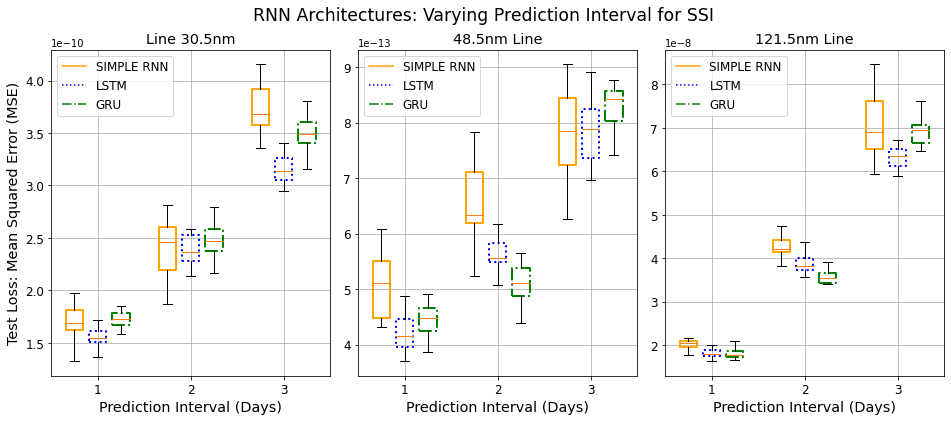

In [109]:
# building base plot with: 17x8
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 6)) 
fig.suptitle(title,fontsize='xx-large')
fig.subplots_adjust(wspace=0.1)

a = 1 #first boxplot initial position
b = 2
c = 3

for i in range(n_groups):
    g1 = df1_simple[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df1_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df1_gru[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax1.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax1.plot([], c=colors[0], label='SIMPLE RNN', linestyle='-')    
ax1.plot([], c=colors[1], label='LSTM', linestyle=':')
ax1.plot([], c=colors[2], label='GRU', linestyle='-.')
ax1.tick_params(axis='x', labelsize='large' ) 
ax1.tick_params(axis='y', labelsize='large' ) 

ax1.legend(fontsize='large')
ax1.grid()

ax1.set_xticks(np.arange(2, n_groups*4, 4)) # repositioning labels batchsize
ax1.set_xticklabels(groups)
ax1.set_xlim(0,n_groups*4)
ax1.set_xlabel(xLabel,fontsize='x-large')
ax1.set_ylabel(yLabel,fontsize='x-large')
ax1.set_title('Line 30.5nm',fontsize='x-large')

a = 1 #first boxplot initial position
b = 2
c = 3

for i in range(n_groups):
    g1 = df2_simple[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df2_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df2_gru[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax2.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax2.plot([], c=colors[0], label='SIMPLE RNN', linestyle='-')    
ax2.plot([], c=colors[1], label='LSTM', linestyle=':')
ax2.plot([], c=colors[2], label='GRU', linestyle='-.')
ax2.tick_params(axis='x', labelsize='large' ) 
ax2.tick_params(axis='y', labelsize='large' ) 

ax2.legend(fontsize='large')
ax2.grid()

ax2.set_xticks(np.arange(2, n_groups*4, 4)) # repositioning labels batchsize
ax2.set_xticklabels(groups)
ax2.set_xlim(0,n_groups*4)
ax2.set_xlabel(xLabel,fontsize='x-large')
# ax2.set_ylabel(yLabel,fontsize='x-large')
ax2.set_title('48.5nm Line',fontsize='x-large')

a = 1 #first boxplot initial position
b = 2
c = 3

for i in range(n_groups):
    g1 = df3_simple[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df3_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df3_gru[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax3.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax3.plot([], c=colors[0], label='SIMPLE RNN', linestyle='-')    
ax3.plot([], c=colors[1], label='LSTM', linestyle=':')
ax3.plot([], c=colors[2], label='GRU', linestyle='-.')
ax3.tick_params(axis='x', labelsize='large' ) 
ax3.tick_params(axis='y', labelsize='large' ) 

ax3.legend(fontsize='large')
ax3.grid()

ax3.set_xticks(np.arange(2, n_groups*4, 4)) # repositioning labels batchsize
ax3.set_xticklabels(groups)
ax3.set_xlim(0,n_groups*4)
ax3.set_xlabel(xLabel,fontsize='x-large')
# ax3.set_ylabel(yLabel,fontsize='x-large')
ax3.set_title('121.5nm Line',fontsize='x-large')

plt.savefig(outputPath+'SSI_SimplexLSTMxGRU_PI.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

In [110]:
n_tests = 20 #number of tests for each setting
n_groups = int(df1_lstm.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = [1, 2, 3]
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN
# xLabel = 'Hidden Units'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'LSTM X GRU: SSI 1 to 3 Days Prediction'
plot_opts={'cutoff':False, 'cutoff_type':'std', 'label_fontsize':'small',
           'label_rotation':0, 'violin_fc':(0.5, 0.5, 0.5),
           'jitter_marker':'.', 'jitter_marker_size':3, 'bean_color':'#FF6F00',
           'bean_mean_color':'#009D91'}

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 20 and the array at index 1 has size 0

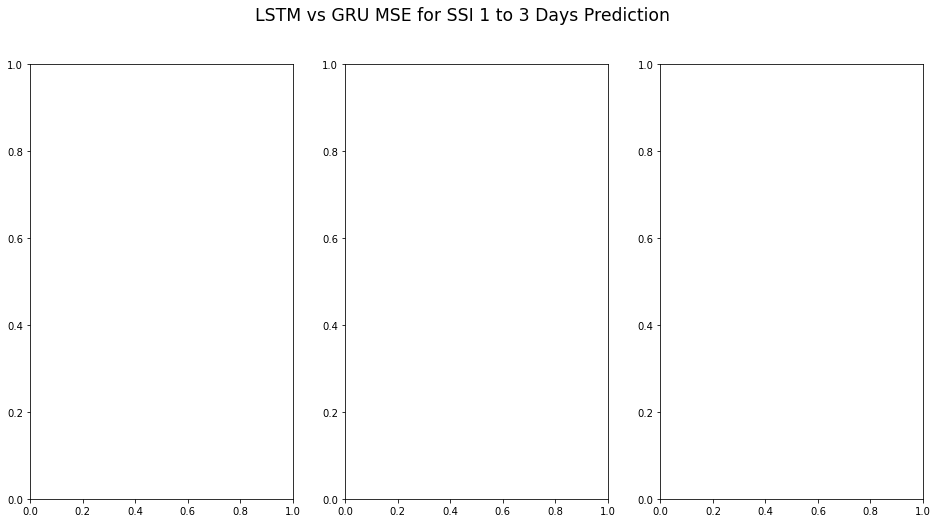

In [194]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,8))
fig.suptitle('LSTM vs GRU MSE for SSI 1 to 3 Days Prediction',fontsize='xx-large')

g1 = df1_lstm[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
g2 = df1_gru[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 

for i in range(1,n_groups):
    g1 = np.c_[g1,df1_lstm[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 
    g2 = np.c_[g2,df1_gru[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 

columns = groups
lstm_data = pd.DataFrame(g1, columns = columns)
gru_data = pd.DataFrame(g2, columns = columns)
gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]

ax = ax1
plot_opts['violin_fc'] = ('#000088')
#plot_opts['violin_fc'] = (0.7,0,0)
plot_opts['violin_width'] = 0.5
plot_opts['bean_show_mean'] = True
plot_opts['bean_show_median'] = False
plot_opts['bean_color'] = 'blue'
plot_opts['bean_mean_color'] = 'blue' 
plot_opts['bean_legend_text'] = 'LSTM (left)'
#plot_opts['cutoff_val'] = 10
sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

plot_opts['violin_fc'] = ('#008800')
plot_opts['bean_color'] = 'green'
plot_opts['bean_mean_color'] = 'green' 
plot_opts['bean_legend_text'] = 'GRU (right)'
sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

ax1.tick_params(axis='x', labelsize='large' ) 
ax1.tick_params(axis='y', labelsize='large' ) 

# ax1.set_ylabel('MSE (Test Loss)', fontsize='x-large')
ax1.set_xlabel('Days', fontsize='x-large')

ax1.set_xticks(np.arange(1,n_groups+1,1))
ax1.set_xticklabels(columns) # repositioning ticks
ax1.set_xlim(0,n_groups+1)
ax1.legend(fontsize='large',loc=2)

ax1.set_title('Line 30.5nm',fontsize='x-large')


g1 = df2_lstm[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
g2 = df2_gru[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 

for i in range(1,n_groups):
    g1 = np.c_[g1,df2_lstm[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 
    g2 = np.c_[g2,df2_gru[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 

columns = groups
lstm_data = pd.DataFrame(g1, columns = columns)
gru_data = pd.DataFrame(g2, columns = columns)
gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]

ax = ax2
plot_opts['violin_fc'] = ('#000088')
#plot_opts['violin_fc'] = (0.7,0,0)
plot_opts['violin_width'] = 0.5
plot_opts['bean_show_mean'] = True
plot_opts['bean_show_median'] = False
plot_opts['bean_color'] = 'blue'
plot_opts['bean_mean_color'] = 'blue' 
plot_opts['bean_legend_text'] = 'LSTM (left)'
#plot_opts['cutoff_val'] = 10
sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

plot_opts['violin_fc'] = ('#008800')
plot_opts['bean_color'] = 'green'
plot_opts['bean_mean_color'] = 'green' 
plot_opts['bean_legend_text'] = 'GRU (right)'
sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

ax2.tick_params(axis='x', labelsize='large' ) 
ax2.tick_params(axis='y', labelsize='large' ) 

# ax2.set_ylabel('MSE (Test Loss)', fontsize='x-large')
ax2.set_xlabel('Days', fontsize='x-large')

ax2.set_xticks(np.arange(1,n_groups+1,1))
ax2.set_xticklabels(columns) # repositioning ticks
ax2.set_xlim(0,n_groups+1)
ax2.legend(fontsize='large',loc=2)

ax2.set_title('Line 48.5nm',fontsize='x-large')


g1 = df3_lstm[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
g2 = df3_gru[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 

for i in range(1,n_groups):
    g1 = np.c_[g1,df3_lstm[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 
    g2 = np.c_[g2,df3_gru[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 

columns = groups
lstm_data = pd.DataFrame(g1, columns = columns)
gru_data = pd.DataFrame(g2, columns = columns)
gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]

ax = ax3
plot_opts['violin_fc'] = ('#000088')
#plot_opts['violin_fc'] = (0.7,0,0)
plot_opts['violin_width'] = 0.5
plot_opts['bean_show_mean'] = True
plot_opts['bean_show_median'] = False
plot_opts['bean_color'] = 'blue'
plot_opts['bean_mean_color'] = 'blue' 
plot_opts['bean_legend_text'] = 'LSTM (left)'
#plot_opts['cutoff_val'] = 10
sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

plot_opts['violin_fc'] = ('#008800')
plot_opts['bean_color'] = 'green'
plot_opts['bean_mean_color'] = 'green' 
plot_opts['bean_legend_text'] = 'GRU (right)'
sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

ax3.tick_params(axis='x', labelsize='large' ) 
ax3.tick_params(axis='y', labelsize='large' ) 

# ax3.set_ylabel('MSE (Test Loss)', fontsize='x-large')
ax3.set_xlabel('Days', fontsize='x-large')

ax3.set_xticks(np.arange(1,n_groups+1,1))
ax3.set_xticklabels(columns) # repositioning ticks
ax3.set_xlim(0,n_groups+1)
ax3.legend(fontsize='large',loc=2)

ax3.set_title('Line 121.5nm',fontsize='x-large')

plt.savefig(outputPath+'SSI_LSTMxGRU_PIViolin.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

# Scaling Experiment

In [4]:
# dflstm1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\Scaling\\Exp_lstm_MinMax.csv')
# dfgru1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\Scaling\\Exp_gru_MinMax.csv')

# dflstm2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\Scaling\\Exp_lstm_MinMax01.csv')
# dfgru2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\Scaling\\Exp_gru_MinMax01.csv')

# dflstm3 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\Scaling\\Exp_lstm_Standard.csv')
# dfgru3 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\Scaling\\Exp_gru_Standard.csv')

# df_lstm = np.concatenate((dflstm1,dflstm2,dflstm3))
# df_gru = np.concatenate((dfgru1,dfgru2,dfgru3))

In [75]:
dflstm1 = np.loadtxt('./output_files/Scaling/Exp_lstm_IO_Std.csv')
dfgru1 = np.loadtxt('./output_files/Scaling/Exp_gru_IO_Std.csv')

dflstm2 = np.loadtxt('./output_files/Scaling/Exp_lstm_IO_-11.csv')
dfgru2 = np.loadtxt('./output_files/Scaling/Exp_gru_IO_-11.csv')

dflstm3 = np.loadtxt('./output_files/Scaling/Exp_lstm_IO_01.csv')
dfgru3 = np.loadtxt('./output_files/Scaling/Exp_gru_IO_01.csv')

dflstm4 = np.loadtxt('./output_files/Scaling/Exp_lstm_IStd_O-11.csv')
dfgru4 = np.loadtxt('./output_files/Scaling/Exp_gru_IStd_O-11.csv')

dflstm5 = np.loadtxt('./output_files/Scaling/Exp_lstm_IStd_O01.csv')
dfgru5 = np.loadtxt('./output_files/Scaling/Exp_gru_IStd_O01.csv')

dflstm6 = np.loadtxt('./output_files/Scaling/Exp_lstm_I-11_OStd.csv')
dfgru6 = np.loadtxt('./output_files/Scaling/Exp_gru_I-11_OStd.csv')

dflstm7 = np.loadtxt('./output_files/Scaling/Exp_lstm_I-11_O01.csv')
dfgru7 = np.loadtxt('./output_files/Scaling/Exp_gru_I-11_O01.csv')

dflstm8 = np.loadtxt('./output_files/Scaling/Exp_lstm_I01_OStd.csv')
dfgru8 = np.loadtxt('./output_files/Scaling/Exp_gru_I01_OStd.csv')

dflstm9 = np.loadtxt('./output_files/Scaling/Exp_lstm_I01_O-11.csv')
dfgru9 = np.loadtxt('./output_files/Scaling/Exp_gru_I01_O-11.csv')

df_lstm = np.concatenate([dflstm1,dflstm2,dflstm3,dflstm4,dflstm5,dflstm6,dflstm7,dflstm8,dflstm9])
df_gru = np.concatenate([dfgru1,dfgru2,dfgru3,dfgru4,dfgru5,dfgru6,dfgru7,dfgru8,dfgru9])

df1_lstm = np.concatenate([dflstm1,dflstm2,dflstm3])
df1_gru = np.concatenate([dfgru1,dfgru2,dfgru3])

df2_lstm = np.concatenate([dflstm4,dflstm5,dflstm6,dflstm7,dflstm8,dflstm9])
df2_gru = np.concatenate([dfgru4,dfgru5,dfgru6,dfgru7,dfgru8,dfgru9])

df3_lstm = np.concatenate([dflstm1,dflstm2,dflstm3,dflstm6,dflstm7,dflstm8,dflstm9])
df3_gru = np.concatenate([dfgru1,dfgru2,dfgru3,dfgru6,dfgru7,dfgru8,dfgru9])

df4_lstm = np.concatenate([dflstm3,dflstm8,dflstm9])
df4_gru = np.concatenate([dfgru3,dfgru8,dfgru9])


In [76]:
n_tests = 20 #number of tests for each setting
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN
# xLabel = 'Hidden Units'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'LSTM X GRU: Scaling Functions for TSI 6h Prediction'
plot_opts={'cutoff':False, 'cutoff_type':'std', 'label_fontsize':'small',
           'label_rotation':0, 'violin_fc':(0.5, 0.5, 0.5),
           'jitter_marker':'.', 'jitter_marker_size':3, 'bean_color':'#FF6F00',
           'bean_mean_color':'#009D91'}

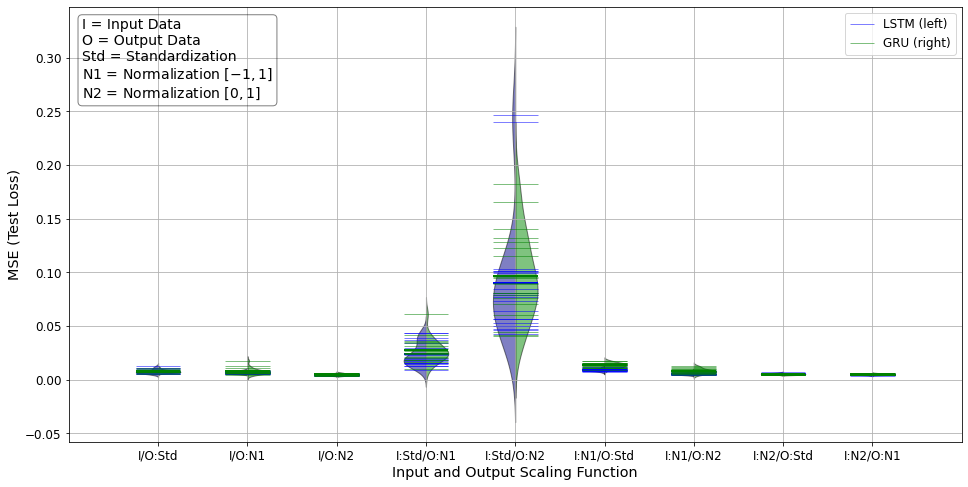

In [83]:
n_groups = int(df_lstm.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = ['I/O:Std','I/O:N1','I/O:N2', 'I:Std/O:N1', 'I:Std/O:N2', 'I:N1/O:Std', 'I:N1/O:N2', 'I:N2/O:Std', 'I:N2/O:N1']

g1 = df_lstm[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
g2 = df_gru[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 

for i in range(1,n_groups):
    g1 = np.c_[g1,df_lstm[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 
    g2 = np.c_[g2,df_gru[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 

columns = groups
lstm_data = pd.DataFrame(g1, columns = columns)
gru_data = pd.DataFrame(g2, columns = columns)
gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]

fig,ax = plt.subplots(figsize=(16,8))
#fig.subplots_adjust(wspace=0)
# ax = ax1

plot_opts['violin_fc'] = ('#000088')
#plot_opts['violin_fc'] = (0.7,0,0)
plot_opts['violin_width'] = 0.5
plot_opts['bean_show_mean'] = True
plot_opts['bean_show_median'] = False
plot_opts['bean_color'] = 'blue'
plot_opts['bean_mean_color'] = 'blue' 
plot_opts['bean_legend_text'] = 'LSTM (left)'
#plot_opts['cutoff_val'] = 10
sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

plot_opts['violin_fc'] = ('#008800')
plot_opts['bean_color'] = 'green'
plot_opts['bean_mean_color'] = 'green' 
plot_opts['bean_legend_text'] = 'GRU (right)'
sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

plt.tick_params(axis='x', labelsize='large' ) 
plt.tick_params(axis='y', labelsize='large' ) 

plt.legend(fontsize='large')
plt.ylabel('MSE (Test Loss)', fontsize='x-large')
plt.xlabel('Input and Output Scaling Function', fontsize='x-large')
# ax1.set_title()
plt.xticks(np.arange(1,n_groups+1,1),columns) # repositioning ticks
plt.xlim(0,n_groups+1)

props = dict(boxstyle='round', facecolor='None', alpha=0.5)

textstr = '\n'.join((
    r'I = Input Data',
    r'O = Output Data',
    r'Std = Standardization',
    r'N1 = Normalization $[-1,1]$',
    r'N2 = Normalization $[0,1]$'))
# place a text box in upper left in axes coords
ax.text(0.015, 0.975, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.grid()

plt.savefig(outputPath+'LSTMxGRU_TSI6H_ScalingT.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

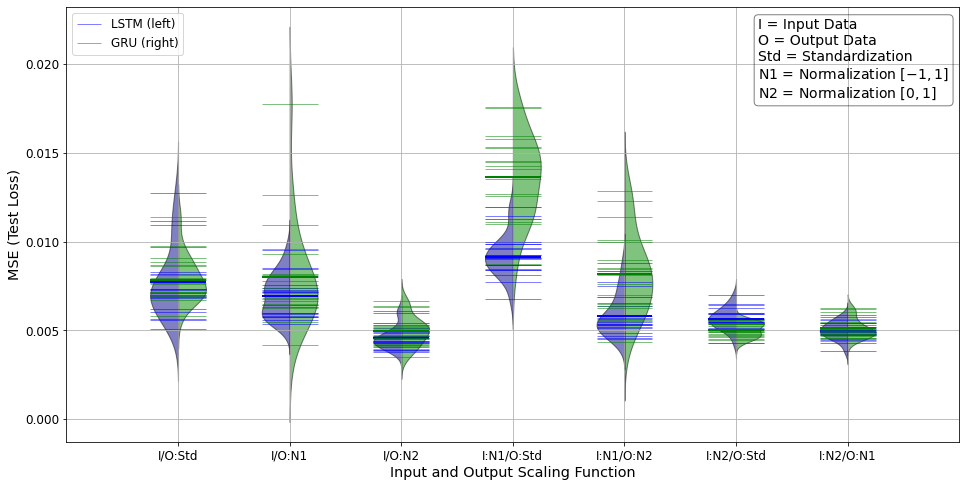

In [84]:
n_groups = int(df3_lstm.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = ['I/O:Std','I/O:N1','I/O:N2', 'I:N1/O:Std', 'I:N1/O:N2', 'I:N2/O:Std', 'I:N2/O:N1']

g1 = df3_lstm[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
g2 = df3_gru[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 

for i in range(1,n_groups):
    g1 = np.c_[g1,df3_lstm[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 
    g2 = np.c_[g2,df3_gru[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 

columns = groups
lstm_data = pd.DataFrame(g1, columns = columns)
gru_data = pd.DataFrame(g2, columns = columns)
gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]

fig,ax = plt.subplots(figsize=(16,8))
#fig.subplots_adjust(wspace=0)
# ax = ax1

plot_opts['violin_fc'] = ('#000088')
#plot_opts['violin_fc'] = (0.7,0,0)
plot_opts['violin_width'] = 0.5
plot_opts['bean_show_mean'] = True
plot_opts['bean_show_median'] = False
plot_opts['bean_color'] = 'blue'
plot_opts['bean_mean_color'] = 'blue' 
plot_opts['bean_legend_text'] = 'LSTM (left)'
#plot_opts['cutoff_val'] = 10
sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

plot_opts['violin_fc'] = ('#008800')
plot_opts['bean_color'] = 'green'
plot_opts['bean_mean_color'] = 'green' 
plot_opts['bean_legend_text'] = 'GRU (right)'
sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

plt.tick_params(axis='x', labelsize='large' ) 
plt.tick_params(axis='y', labelsize='large' ) 

plt.legend(fontsize='large',loc=2)
plt.ylabel('MSE (Test Loss)', fontsize='x-large')
plt.xlabel('Input and Output Scaling Function', fontsize='x-large')
# ax1.set_title()
plt.xticks(np.arange(1,n_groups+1,1),columns) # repositioning ticks
plt.xlim(0,n_groups+1)

props = dict(boxstyle='round', facecolor='None', alpha=0.5)

textstr = '\n'.join((
    r'I = Input Data',
    r'O = Output Data',
    r'Std = Standardization',
    r'N1 = Normalization $[-1,1]$',
    r'N2 = Normalization $[0,1]$'))
# place a text box in upper left in axes coords
ax.text(0.775, 0.975, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='left',bbox=props)

plt.grid()

plt.savefig(outputPath+'LSTMxGRU_TSI6H_ScalingNInput.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

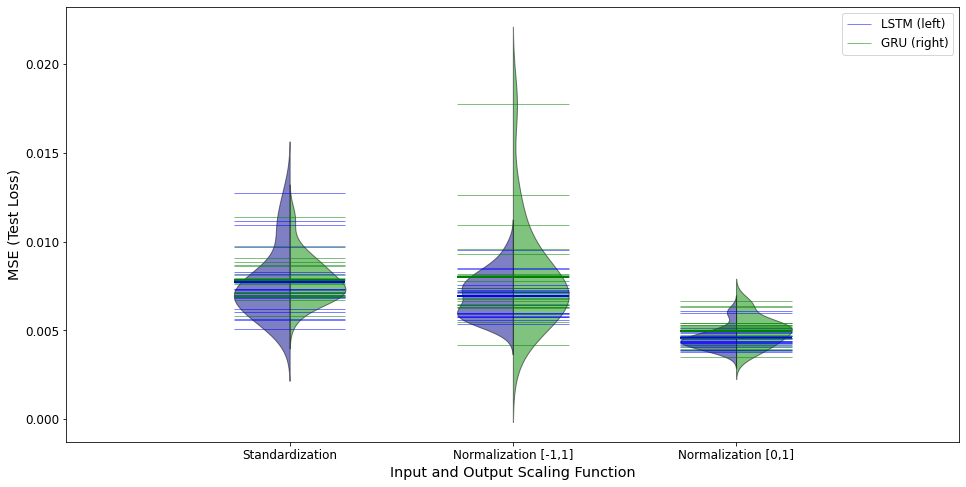

In [79]:
# n_groups = int(df1_lstm.shape[0]/n_tests) #number of groups
# intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
# groups = ['Standardization','Normalization [-1,1]','Normalization [0,1]']

# g1 = df1_lstm[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
# g2 = df1_gru[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 

# for i in range(1,n_groups):
#     g1 = np.c_[g1,df1_lstm[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 
#     g2 = np.c_[g2,df1_gru[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 

# columns = groups
# lstm_data = pd.DataFrame(g1, columns = columns)
# gru_data = pd.DataFrame(g2, columns = columns)
# gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
# lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]

# fig,ax = plt.subplots(figsize=(16,8))
# #fig.subplots_adjust(wspace=0)
# # ax = ax1

# plot_opts['violin_fc'] = ('#000088')
# #plot_opts['violin_fc'] = (0.7,0,0)
# plot_opts['violin_width'] = 0.5
# plot_opts['bean_show_mean'] = True
# plot_opts['bean_show_median'] = False
# plot_opts['bean_color'] = 'blue'
# plot_opts['bean_mean_color'] = 'blue' 
# plot_opts['bean_legend_text'] = 'LSTM (left)'
# #plot_opts['cutoff_val'] = 10
# sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

# plot_opts['violin_fc'] = ('#008800')
# plot_opts['bean_color'] = 'green'
# plot_opts['bean_mean_color'] = 'green' 
# plot_opts['bean_legend_text'] = 'GRU (right)'
# sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

# plt.tick_params(axis='x', labelsize='large' ) 
# plt.tick_params(axis='y', labelsize='large' ) 


# plt.legend(fontsize='large')
# plt.ylabel('MSE (Test Loss)', fontsize='x-large')
# plt.xlabel('Input and Output Scaling Function', fontsize='x-large')
# # ax1.set_title()
# plt.xticks(np.arange(1,n_groups+1,1),columns) # repositioning ticks
# plt.xlim(0,n_groups+1)

# plt.savefig(outputPath+'LSTMxGRU_TSI6H_ScalingEquals.png', dpi=200, bbox_inches='tight', transparent=False, 
#             pad_inches=0.1)

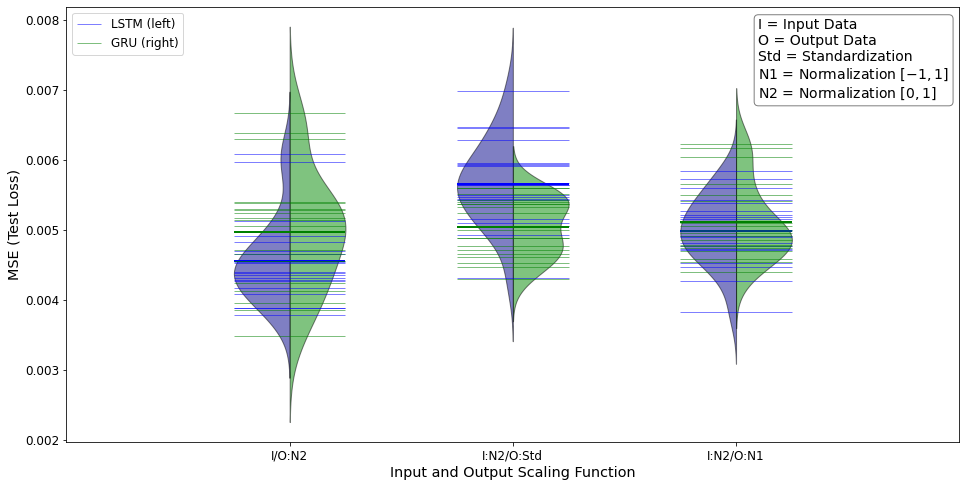

In [80]:
n_groups = int(df4_lstm.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = ['I/O:N2', 'I:N2/O:Std', 'I:N2/O:N1']

g1 = df4_lstm[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
g2 = df4_gru[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 

for i in range(1,n_groups):
    g1 = np.c_[g1,df4_lstm[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 
    g2 = np.c_[g2,df4_gru[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 

columns = groups
lstm_data = pd.DataFrame(g1, columns = columns)
gru_data = pd.DataFrame(g2, columns = columns)
gru = [gru_data.iloc[:, i] for i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for i in range(lstm_data.shape[-1])]

fig,ax = plt.subplots(figsize=(16,8))
#fig.subplots_adjust(wspace=0)
# ax = ax1

plot_opts['violin_fc'] = ('#000088')
#plot_opts['violin_fc'] = (0.7,0,0)
plot_opts['violin_width'] = 0.5
plot_opts['bean_show_mean'] = True
plot_opts['bean_show_median'] = False
plot_opts['bean_color'] = 'blue'
plot_opts['bean_mean_color'] = 'blue' 
plot_opts['bean_legend_text'] = 'LSTM (left)'
#plot_opts['cutoff_val'] = 10
sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)

plot_opts['violin_fc'] = ('#008800')
plot_opts['bean_color'] = 'green'
plot_opts['bean_mean_color'] = 'green' 
plot_opts['bean_legend_text'] = 'GRU (right)'
sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

plt.tick_params(axis='x', labelsize='large' ) 
plt.tick_params(axis='y', labelsize='large' ) 

plt.legend(fontsize='large',loc=2)
plt.ylabel('MSE (Test Loss)', fontsize='x-large')
plt.xlabel('Input and Output Scaling Function', fontsize='x-large')
# ax1.set_title()
plt.xticks(np.arange(1,n_groups+1,1),columns) # repositioning ticks
plt.xlim(0,n_groups+1)

props = dict(boxstyle='round', facecolor='None', alpha=0.5)

textstr = '\n'.join((
    r'I = Input Data',
    r'O = Output Data',
    r'Std = Standardization',
    r'N1 = Normalization $[-1,1]$',
    r'N2 = Normalization $[0,1]$'))
# place a text box in upper left in axes coords
ax.text(0.775, 0.975, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='left',bbox=props)

plt.savefig(outputPath+'LSTMxGRU_TSI6H_Scaling_IN2.png', dpi=200, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

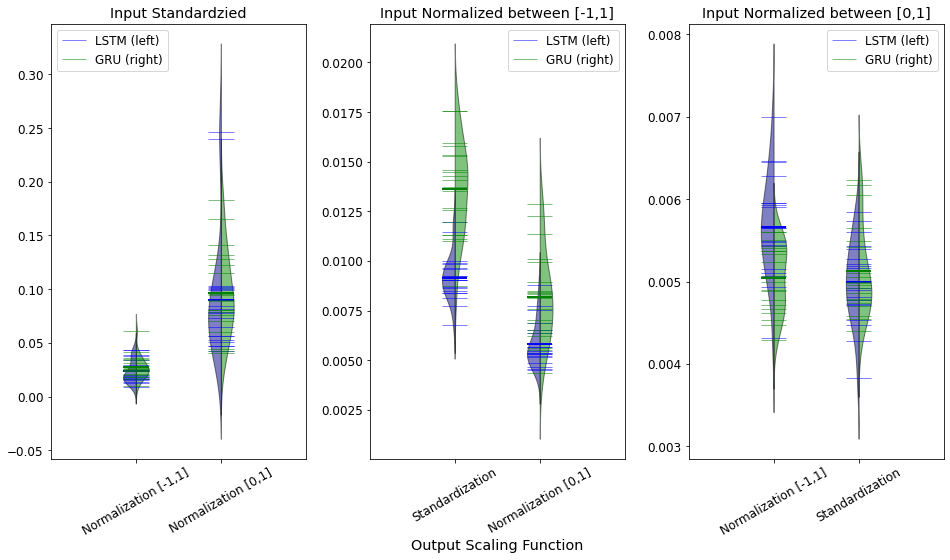

In [81]:
# n_groups = int(df2_lstm.shape[0]/n_tests) #number of groups
# intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
# groups = ['Normalization [-1,1]','Normalization [0,1]','Standardization','Normalization [0,1]','Normalization [-1,1]','Standardization']
# # groups = ['Standardization','Normalization [-1,1]','Normalization [0,1]']
# n_groups=2

# fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,8))
# fig.subplots_adjust(wspace=0.25)

# ax=ax1
# g1 = df2_lstm[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
# g2 = df2_gru[intervals[0]:intervals[0]+n_tests, 3] #values for the i-th group 
# g1 = np.c_[g1,df2_lstm[intervals[1]:intervals[1]+n_tests, 3]] #values for the i-th group 
# g2 = np.c_[g2,df2_gru[intervals[1]:intervals[1]+n_tests, 3]] #values for the i-th group 

# columns = groups[:2]
# lstm_data = pd.DataFrame(g1, columns = columns)
# gru_data = pd.DataFrame(g2, columns = columns)
# gru = [gru_data.iloc[:, i] for  i in range(gru_data.shape[-1])]
# lstm = [lstm_data.iloc[:, i] for  i in range(lstm_data.shape[-1])]

# plot_opts['violin_fc'] = ('#000088')
# #plot_opts['violin_fc'] = (0.7,0,0)
# plot_opts['violin_width'] = 0.5
# plot_opts['bean_show_mean'] = True
# plot_opts['bean_show_median'] = False
# plot_opts['bean_color'] = 'blue'
# plot_opts['bean_mean_color'] = 'blue' 
# plot_opts['bean_legend_text'] = 'LSTM (left)'
# #plot_opts['cutoff_val'] = 10

# sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)
# plot_opts['violin_fc'] = ('#008800')
# plot_opts['bean_color'] = 'green'
# plot_opts['bean_mean_color'] = 'green' 
# plot_opts['bean_legend_text'] = 'GRU (right)'
# sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

# ax1.tick_params(axis='x', labelsize='large' ) 
# ax1.tick_params(axis='y', labelsize='large' ) 

# ax1.legend(fontsize='large',loc=2)
# # ax1.set_ylabel('MSE (Test Loss)', fontsize='x-large')
# # ax1.set_xlabel('Output Scaling Function', fontsize='x-large')
# ax1.set_title('Input Standardzied', fontsize='x-large')
# ax1.set_xticks(np.arange(1,n_groups+1,1))
# ax1.set_xticklabels(columns, rotation=30) # repositioning ticks
# ax1.set_xlim(0,n_groups+1)

# ax=ax2
# g1 = df2_lstm[intervals[2]:intervals[2]+n_tests, 3] #values for the i-th group 
# g2 = df2_gru[intervals[2]:intervals[2]+n_tests, 3] #values for the i-th group 
# g1 = np.c_[g1,df2_lstm[intervals[3]:intervals[3]+n_tests, 3]] #values for the i-th group 
# g2 = np.c_[g2,df2_gru[intervals[3]:intervals[3]+n_tests, 3]] #values for the i-th group 

# columns = groups[2:4]
# lstm_data = pd.DataFrame(g1, columns = columns)
# gru_data = pd.DataFrame(g2, columns = columns)
# gru = [gru_data.iloc[:, i] for  i in range(gru_data.shape[-1])]
# lstm = [lstm_data.iloc[:, i] for  i in range(lstm_data.shape[-1])]

# plot_opts['violin_fc'] = ('#000088')
# #plot_opts['violin_fc'] = (0.7,0,0)
# plot_opts['violin_width'] = 0.5
# plot_opts['bean_show_mean'] = True
# plot_opts['bean_show_median'] = False
# plot_opts['bean_color'] = 'blue'
# plot_opts['bean_mean_color'] = 'blue' 
# plot_opts['bean_legend_text'] = 'LSTM (left)'
# #plot_opts['cutoff_val'] = 10

# sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)
# plot_opts['violin_fc'] = ('#008800')
# plot_opts['bean_color'] = 'green'
# plot_opts['bean_mean_color'] = 'green' 
# plot_opts['bean_legend_text'] = 'GRU (right)'
# sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

# ax2.tick_params(axis='x', labelsize='large' ) 
# ax2.tick_params(axis='y', labelsize='large' ) 

# ax2.legend(fontsize='large')
# # ax2.set_ylabel('MSE (Test Loss)', fontsize='x-large')
# ax2.set_xlabel('Output Scaling Function', fontsize='x-large')
# ax2.set_title('Input Normalized between [-1,1]', fontsize='x-large')
# ax2.set_xticks(np.arange(1,n_groups+1,1))
# ax2.set_xticklabels(columns, rotation=30) # repositioning ticks
# ax2.set_xlim(0,n_groups+1)

# ax=ax3
# g1 = df2_lstm[intervals[4]:intervals[4]+n_tests, 3] #values for the i-th group 
# g2 = df2_gru[intervals[4]:intervals[4]+n_tests, 3] #values for the i-th group 
# g1 = np.c_[g1,df2_lstm[intervals[5]:intervals[5]+n_tests, 3]] #values for the i-th group 
# g2 = np.c_[g2,df2_gru[intervals[5]:intervals[5]+n_tests, 3]] #values for the i-th group 

# columns = groups[4:6]
# lstm_data = pd.DataFrame(g1, columns = columns)
# gru_data = pd.DataFrame(g2, columns = columns)
# gru = [gru_data.iloc[:, i] for  i in range(gru_data.shape[-1])]
# lstm = [lstm_data.iloc[:, i] for  i in range(lstm_data.shape[-1])]

# plot_opts['violin_fc'] = ('#000088')
# #plot_opts['violin_fc'] = (0.7,0,0)
# plot_opts['violin_width'] = 0.5
# plot_opts['bean_show_mean'] = True
# plot_opts['bean_show_median'] = False
# plot_opts['bean_color'] = 'blue'
# plot_opts['bean_mean_color'] = 'blue' 
# plot_opts['bean_legend_text'] = 'LSTM (left)'
# #plot_opts['cutoff_val'] = 10

# sm.graphics.beanplot(lstm, ax=ax, labels=columns, side='left',jitter=False, plot_opts=plot_opts)
# plot_opts['violin_fc'] = ('#008800')
# plot_opts['bean_color'] = 'green'
# plot_opts['bean_mean_color'] = 'green' 
# plot_opts['bean_legend_text'] = 'GRU (right)'
# sm.graphics.beanplot(gru, ax=ax, labels=columns, side='right', jitter=False, plot_opts=plot_opts)

# ax3.tick_params(axis='x', labelsize='large' ) 
# ax3.tick_params(axis='y', labelsize='large' ) 

# ax3.legend(fontsize='large')
# # ax3.set_ylabel('MSE (Test Loss)', fontsize='x-large')
# # ax3.set_xlabel('Output Scaling Function', fontsize='x-large')
# ax3.set_title('Input Normalized between [0,1]', fontsize='x-large')
# ax3.set_xticks(np.arange(1,n_groups+1,1))
# ax3.set_xticklabels(columns, rotation=30) # repositioning ticks
# ax3.set_xlim(0,n_groups+1)
# plt.savefig(outputPath+'LSTMxGRU_TSI6H_ScalingSeparated.png', dpi=200, bbox_inches='tight', transparent=False, 
#             pad_inches=0.1)

In [13]:
g1.shape

(20, 6)

In [15]:
S1 = np.asarray(np.loadtxt('./partial_output_files/SatireTSI_412dias.csv'))
E1 = np.asarray(np.loadtxt('./partial_output_files/EmpireTSI_412dias.csv'))
S2 = np.asarray(np.loadtxt('./partial_output_files/SatireTSI_301dias.csv'))
E2 = np.asarray(np.loadtxt('./partial_output_files/EmpireTSI_301dias.csv'))
S3 = np.asarray(np.loadtxt('./partial_output_files/SatireTSI_211dias.csv'))
E3 = np.asarray(np.loadtxt('./partial_output_files/EmpireTSI_211dias.csv'))
S4 = np.asarray(np.loadtxt('./partial_output_files/SatireTSI_28dias.csv'))
E4 = np.asarray(np.loadtxt('./partial_output_files/EmpireTSI_28dias.csv'))
T1 = np.asarray(np.loadtxt('./partial_output_files/T_412dias.csv'))
T2 = np.asarray(np.loadtxt('./partial_output_files/T_301dias.csv'))
T3 = np.asarray(np.loadtxt('./partial_output_files/T_211dias.csv'))
T4 = np.asarray(np.loadtxt('./partial_output_files/T_28dias.csv'))

S3R2 = r2_score(T3, S3)
S3R, a = stats.pearsonr(np.squeeze(T3), np.squeeze(S3))
S3MSE = mean_squared_error(T3, S3)
S3MAPE = mean_absolute_percentage_error(T3, S3)

E3R2 = r2_score(T3, E3)
E3R, a = stats.pearsonr(np.squeeze(T3), np.squeeze(E3))
E3MSE = mean_squared_error(T3, E3)
E3MAPE = mean_absolute_percentage_error(T3, E3)

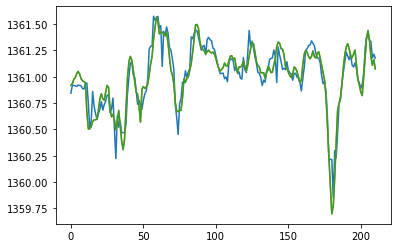

In [16]:
plt.plot(E3)
plt.plot(T3)
plt.plot(T3)

### Loading LSTM Results

In [17]:
# read data
df1_lstm = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\LSTM vs Models\\6hoursExp_lstm.csv')
df2_lstm = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\12hoursExp_lstm.csv')
df3_lstm = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\18hoursExp_lstm.csv')
df4_lstm = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\24hoursExp_lstm.csv')
df5_lstm = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\48hoursExp_lstm.csv')
df6_lstm = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\72hoursExp_lstm.csv')

# print(df1.shape)
# print(df2.shape)
# print(df3.shape)
# print(df4.shape)
# print(df5.shape)
# print(df6.shape)

df_lstm = np.concatenate((df1_lstm,df2_lstm,df3_lstm,df4_lstm,df5_lstm,df6_lstm))

### Loading GRU Results

In [18]:
# read data
df1_gru = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\LSTM vs Models\\6hoursExp_gru.csv')
df2_gru = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\12hoursExp_gru.csv')
df3_gru = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\18hoursExp_gru.csv')
df4_gru = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\24hoursExp_gru.csv')
df5_gru = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\48hoursExp_gru.csv')
df6_gru = np.loadtxt('C:\\Users\Ami\Documents\GitHub\JSWSC\Traduzido\LSTMTests\\LSTM vs Models\\72hoursExp_gru.csv')

# print(df1.shape)
# print(df2.shape)
# print(df3.shape)
# print(df4.shape)
# print(df5.shape)
# print(df6.shape)

df_gru = np.concatenate((df1_gru,df2_gru,df3_gru,df4_gru,df5_gru,df6_gru))

In [19]:
n_tests = 20 #number of tests for each setting
n_groups = int(df_gru.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = [6,12,18,24,48,72] # Each group label
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN

### Calculating Means and Standard Deviations

#### LSTM

In [20]:
df1MeansStds_lstm = [] #R2
df2MeansStds_lstm = [] #R
df3MeansStds_lstm = [] #MSE
df4MeansStds_lstm = [] #MAPE

for i in range(n_groups):
    df1MeansStds_lstm.append([np.mean(df_lstm[intervals[i]:intervals[i]+n_tests, 1]), np.std(df_lstm[intervals[i]:intervals[i]+n_tests, 1])])
    df2MeansStds_lstm.append([np.mean(df_lstm[intervals[i]:intervals[i]+n_tests, 2]), np.std(df_lstm[intervals[i]:intervals[i]+n_tests, 2])])
    df3MeansStds_lstm.append([np.mean(df_lstm[intervals[i]:intervals[i]+n_tests, 3]), np.std(df_lstm[intervals[i]:intervals[i]+n_tests, 3])])
    df4MeansStds_lstm.append([np.mean(df_lstm[intervals[i]:intervals[i]+n_tests, 4]), np.std(df_lstm[intervals[i]:intervals[i]+n_tests, 4])])
    
df1MeansStds_lstm = np.asarray(df1MeansStds_lstm)
df2MeansStds_lstm = np.asarray(df2MeansStds_lstm)
df3MeansStds_lstm = np.asarray(df3MeansStds_lstm)
df4MeansStds_lstm = np.asarray(df4MeansStds_lstm)


#### GRU

In [21]:
df1MeansStds_gru = [] #R2
df2MeansStds_gru = [] #R
df3MeansStds_gru = [] #MSE
df4MeansStds_gru = [] #MAPE

for i in range(n_groups):
    df1MeansStds_gru.append([np.mean(df_gru[intervals[i]:intervals[i]+n_tests, 1]), np.std(df_gru[intervals[i]:intervals[i]+n_tests, 1])])
    df2MeansStds_gru.append([np.mean(df_gru[intervals[i]:intervals[i]+n_tests, 2]), np.std(df_gru[intervals[i]:intervals[i]+n_tests, 2])])
    df3MeansStds_gru.append([np.mean(df_gru[intervals[i]:intervals[i]+n_tests, 3]), np.std(df_gru[intervals[i]:intervals[i]+n_tests, 3])])
    df4MeansStds_gru.append([np.mean(df_gru[intervals[i]:intervals[i]+n_tests, 4]), np.std(df_gru[intervals[i]:intervals[i]+n_tests, 4])])
    
df1MeansStds_gru = np.asarray(df1MeansStds_gru)
df2MeansStds_gru = np.asarray(df2MeansStds_gru)
df3MeansStds_gru = np.asarray(df3MeansStds_gru)
df4MeansStds_gru = np.asarray(df4MeansStds_gru)


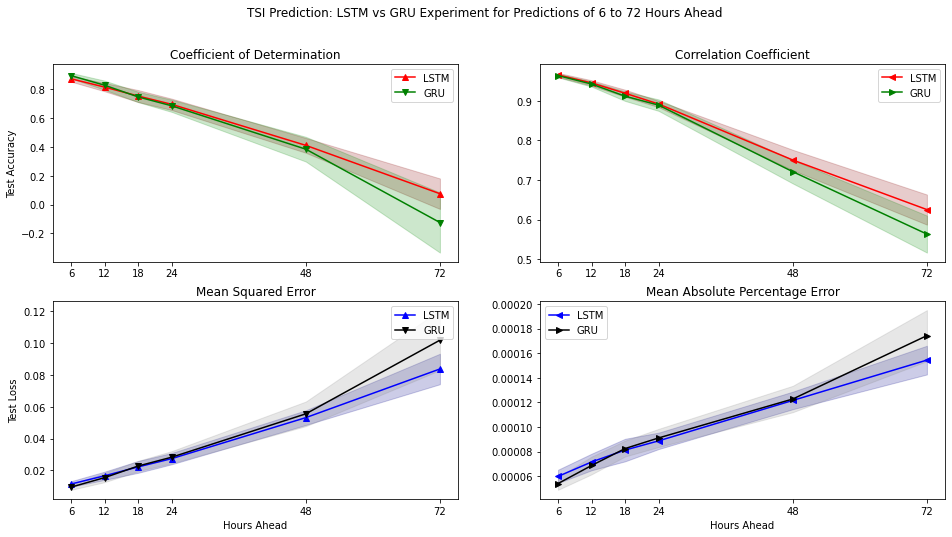

In [22]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(16,8))

fig.suptitle('TSI Prediction: LSTM vs GRU Experiment for Predictions of 6 to 72 Hours Ahead')
#fig.subplots_adjust(wspace=0)
plt.setp((ax3,ax4), xlabel = 'Hours Ahead')

ax1.plot(groups, df1MeansStds_lstm[:,0], c=colors[0], label='LSTM', marker='^')
ax1.fill_between(groups, df1MeansStds_lstm[:,0] - df1MeansStds_lstm[:,1], df1MeansStds_lstm[:,0] + df1MeansStds_lstm[:,1], color='#880000', alpha=0.2)

ax2.plot(groups, df2MeansStds_lstm[:,0], c=colors[0], label='LSTM', marker='<')
ax2.fill_between(groups, df2MeansStds_lstm[:,0] - df2MeansStds_lstm[:,1], df2MeansStds_lstm[:,0] + df2MeansStds_lstm[:,1], color='#880000', alpha=0.2)

ax1.plot(groups, df1MeansStds_gru[:,0], c=colors[1], label='GRU', marker='v')
ax1.fill_between(groups, df1MeansStds_gru[:,0] - df1MeansStds_gru[:,1], df1MeansStds_gru[:,0] + df1MeansStds_gru[:,1], color='#008800', alpha=0.2)

ax2.plot(groups, df2MeansStds_gru[:,0], c=colors[1], label='GRU', marker='>')
ax2.fill_between(groups, df2MeansStds_gru[:,0] - df2MeansStds_gru[:,1], df2MeansStds_gru[:,0] + df2MeansStds_gru[:,1], color='#008800', alpha=0.2)

ax3.plot(groups, df3MeansStds_lstm[:,0], c=colors[2], label='LSTM', marker='^')
ax3.fill_between(groups, df3MeansStds_lstm[:,0] - df3MeansStds_lstm[:,1], df3MeansStds_lstm[:,0] + df3MeansStds_lstm[:,1], color='#000088', alpha=0.2)

ax4.plot(groups, df4MeansStds_lstm[:,0], c=colors[2], label='LSTM', marker='<')
ax4.fill_between(groups, df4MeansStds_lstm[:,0] - df4MeansStds_lstm[:,1], df4MeansStds_lstm[:,0] + df4MeansStds_lstm[:,1], color='#000088', alpha=0.2)

ax3.plot(groups, df3MeansStds_gru[:,0], c=colors[3], label='GRU', marker='v')
ax3.fill_between(groups, df3MeansStds_gru[:,0] - df3MeansStds_gru[:,1], df3MeansStds_gru[:,0] + df3MeansStds_gru[:,1], color='#888888', alpha=0.2)

ax4.plot(groups, df4MeansStds_gru[:,0], c=colors[3], label='GRU', marker='>')
ax4.fill_between(groups, df4MeansStds_gru[:,0] - df4MeansStds_gru[:,1], df4MeansStds_gru[:,0] + df4MeansStds_gru[:,1], color='#888888', alpha=0.2)

ax1.legend()
ax1.set_title('Coefficient of Determination')
ax2.legend()
ax2.set_title('Correlation Coefficient')
ax3.legend()
ax3.set_title('Mean Squared Error')
ax4.legend()
ax4.set_title('Mean Absolute Percentage Error')

ax1.set_xticks(groups) # repositioning labels batchsize
ax2.set_xticks(groups)
ax3.set_xticks(groups)
ax4.set_xticks(groups)
ax1.set_ylabel('Test Accuracy')
ax3.set_ylabel('Test Loss')
plt.show()

## Ploting MSE

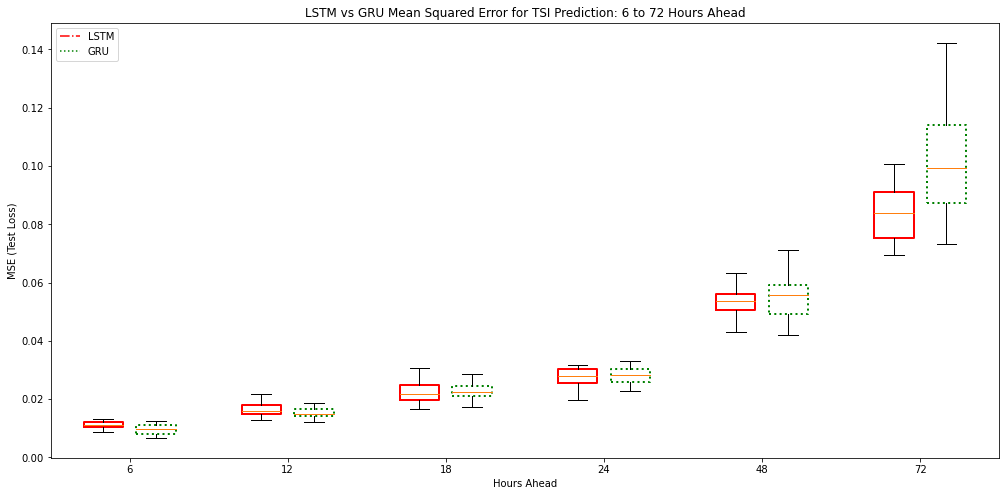

In [23]:
n_tests = 20 #number of tests for each setting
n_groups = int(df_gru.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = [6,12,18,24,48,72] # Each group label
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN

a = 1 #first boxplot initial position
b = 2

# building base plot with: 17x8
fig, ax = plt.subplots(figsize=(17, 8)) 
#fig, ax = plt.subplots() 

for i in range(n_groups):
    g1 = df_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df_gru[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 

    boxes = plt.boxplot([g1,g2], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    
    # increment positions of plots
    a = b+2
    b = a+1

plt.plot([], c=colors[0], label='LSTM', linestyle='-.')
plt.plot([], c=colors[1], label='GRU', linestyle=':')

plt.legend()

plt.xticks(np.arange(1.5, n_groups*3, 3),groups) # repositioning labels batchsize
plt.xlim(0,n_groups*3)
plt.xlabel('Hours Ahead')
plt.ylabel('MSE (Test Loss)')
plt.title('LSTM vs GRU Mean Squared Error for TSI Prediction: 6 to 72 Hours Ahead')
plt.savefig('box10.png', dpi=70, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

# SMSE = np.zeros((n_groups)) 
# for i in range(n_groups):
#     SMSE[i] = S3MSE
# plt.plot(groups,SMSE,'-')
# plt.show()

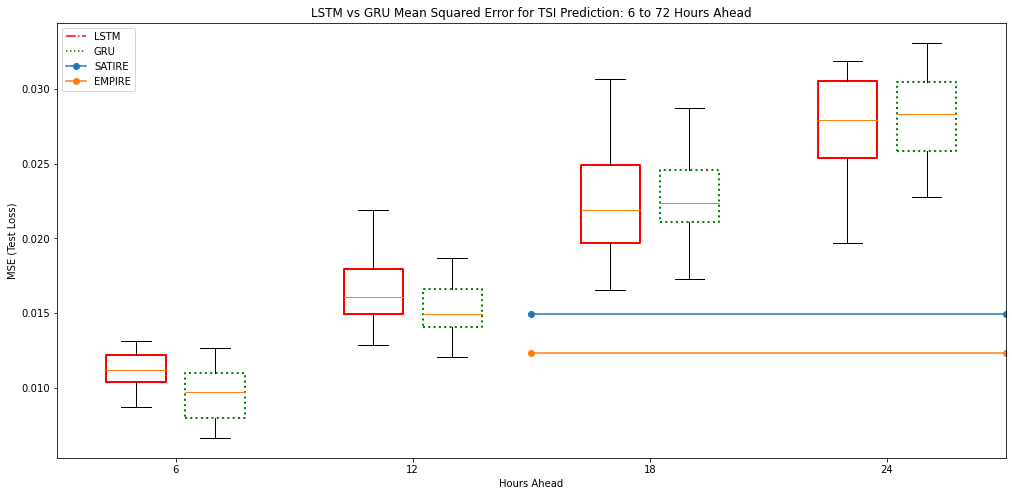

In [24]:
a = 1 #first boxplot initial position
b = 2

# building base plot with: 17x8
fig, ax = plt.subplots(figsize=(17, 8)) 
#fig, ax = plt.subplots() 

n_groups = 4

for i in range(n_groups):
    g1 = df_lstm[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df_gru[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 

    boxes = plt.boxplot([g1,g2], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    
    # increment positions of plots
    a = b+2
    b = a+1

plt.plot([], c=colors[0], label='LSTM', linestyle='-.')
plt.plot([], c=colors[1], label='GRU', linestyle=':')

plt.legend()

plt.xticks(np.arange(1.5, n_groups*3, 3),groups[:4]) # repositioning labels batchsize
plt.xlim(0,n_groups*3)
plt.xlabel('Hours Ahead')
plt.ylabel('MSE (Test Loss)')
plt.title('LSTM vs GRU Mean Squared Error for TSI Prediction: 6 to 72 Hours Ahead')
plt.savefig('box10.png', dpi=70, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

SMSE = np.zeros((n_groups)) 
for i in range(n_groups):
    SMSE[i] = S3MSE
plt.plot(groups[:4],SMSE,'o-', label='SATIRE')

EMSE = np.zeros((n_groups)) 
for i in range(n_groups):
    EMSE[i] = E3MSE
plt.plot(groups[:4],EMSE,'o-', label='EMPIRE')

plt.legend()
plt.show()

### Ploting Correlation Coefficient

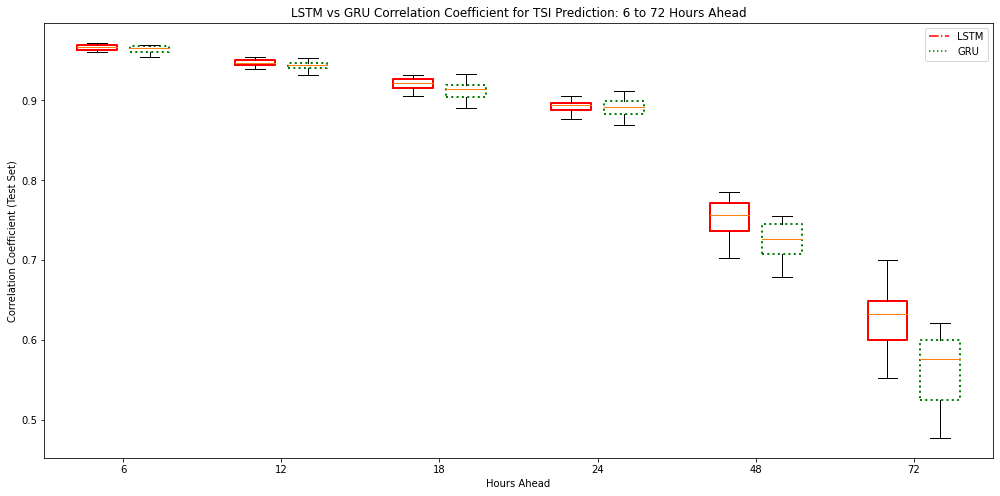

In [25]:
a = 1 #first boxplot initial position
b = 2
n_groups = 6
# building base plot with: 17x8
fig, ax = plt.subplots(figsize=(17, 8)) 
#fig, ax = plt.subplots() 

for i in range(n_groups):
    g1 = df_lstm[intervals[i]:intervals[i]+n_tests, 2] #values for the i-th group 
    g2 = df_gru[intervals[i]:intervals[i]+n_tests, 2] #values for the i-th group 

    boxes = plt.boxplot([g1,g2], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    
    # increment positions of plots
    a = b+2
    b = a+1

plt.plot([], c=colors[0], label='LSTM', linestyle='-.')
plt.plot([], c=colors[1], label='GRU', linestyle=':')

plt.legend()

plt.xticks(np.arange(1.5, n_groups*3, 3),groups) # repositioning labels batchsize
plt.xlim(0,n_groups*3)
plt.xlabel('Hours Ahead')
plt.ylabel('Correlation Coefficient (Test Set)')
plt.title('LSTM vs GRU Correlation Coefficient for TSI Prediction: 6 to 72 Hours Ahead')
plt.savefig('box10.png', dpi=70, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

# SR = np.zeros((n_groups)) 
# for i in range(n_groups):
#     SR[i] = S3R
# plt.plot(groups,SR,'o-', label='SATIRE')

# ER = np.zeros((n_groups)) 
# for i in range(n_groups):
#     ER[i] = E3R
# plt.plot(groups,ER,'o-', label='EMPIRE')

# plt.legend()
# plt.show()

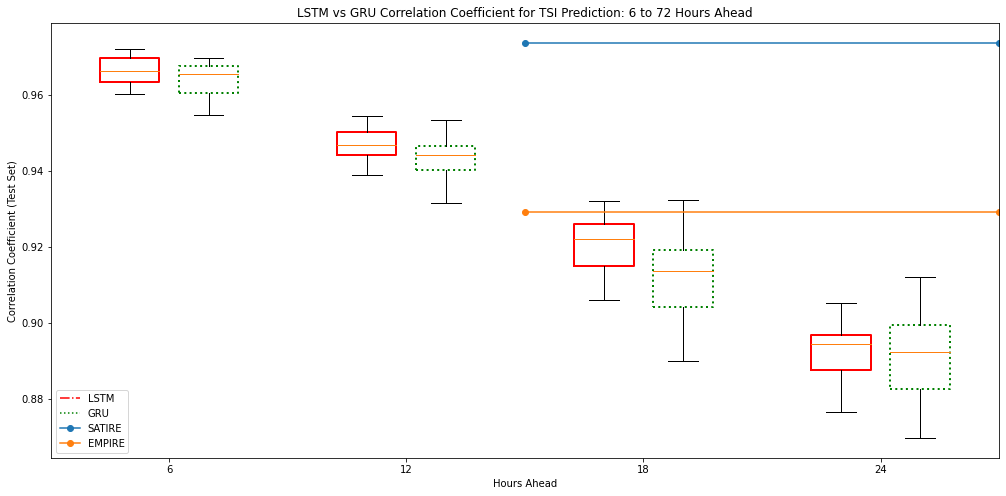

In [26]:
a = 1 #first boxplot initial position
b = 2
n_groups = 4
# building base plot with: 17x8
fig, ax = plt.subplots(figsize=(17, 8)) 
#fig, ax = plt.subplots() 

for i in range(n_groups):
    g1 = df_lstm[intervals[i]:intervals[i]+n_tests, 2] #values for the i-th group 
    g2 = df_gru[intervals[i]:intervals[i]+n_tests, 2] #values for the i-th group 

    boxes = plt.boxplot([g1,g2], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    
    # increment positions of plots
    a = b+2
    b = a+1

plt.plot([], c=colors[0], label='LSTM', linestyle='-.')
plt.plot([], c=colors[1], label='GRU', linestyle=':')

plt.legend()

plt.xticks(np.arange(1.5, n_groups*3, 3),groups[:4]) # repositioning labels batchsize
plt.xlim(0,n_groups*3)
plt.xlabel('Hours Ahead')
plt.ylabel('Correlation Coefficient (Test Set)')
plt.title('LSTM vs GRU Correlation Coefficient for TSI Prediction: 6 to 72 Hours Ahead')
plt.savefig('box10.png', dpi=70, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

SR = np.zeros((n_groups)) 
for i in range(n_groups):
    SR[i] = S3R
plt.plot(groups[:4],SR,'o-', label='SATIRE')

ER = np.zeros((n_groups)) 
for i in range(n_groups):
    ER[i] = E3R
plt.plot(groups[:4],ER,'o-', label='EMPIRE')

plt.legend()
plt.show()

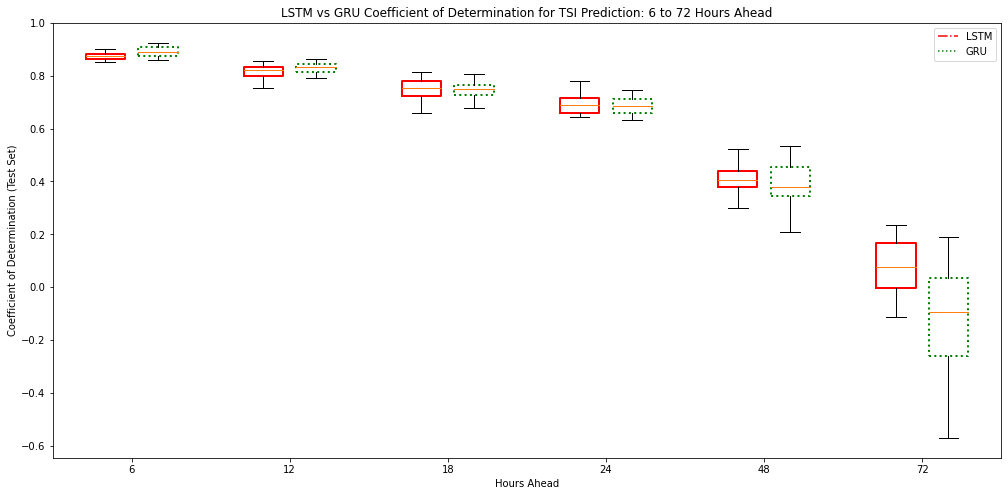

In [27]:
a = 1 #first boxplot initial position
b = 2
n_groups = 6
# building base plot with: 17x8
fig, ax = plt.subplots(figsize=(17, 8)) 
#fig, ax = plt.subplots() 

for i in range(n_groups):
    g1 = df_lstm[intervals[i]:intervals[i]+n_tests, 1] #values for the i-th group 
    g2 = df_gru[intervals[i]:intervals[i]+n_tests, 1] #values for the i-th group 

    boxes = plt.boxplot([g1,g2], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    
    # increment positions of plots
    a = b+2
    b = a+1

plt.plot([], c=colors[0], label='LSTM', linestyle='-.')
plt.plot([], c=colors[1], label='GRU', linestyle=':')

plt.legend()

plt.xticks(np.arange(1.5, n_groups*3, 3),groups) # repositioning labels batchsize
plt.xlim(0,n_groups*3)
plt.xlabel('Hours Ahead')
plt.ylabel('Coefficient of Determination (Test Set)')
plt.title('LSTM vs GRU Coefficient of Determination for TSI Prediction: 6 to 72 Hours Ahead')
plt.savefig('box10.png', dpi=70, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

# SR = np.zeros((n_groups)) 
# for i in range(n_groups):
#     SR[i] = S3R
# plt.plot(groups,SR,'o-', label='SATIRE')

# ER = np.zeros((n_groups)) 
# for i in range(n_groups):
#     ER[i] = E3R
# plt.plot(groups,ER,'o-', label='EMPIRE')

# plt.legend()
# plt.show()

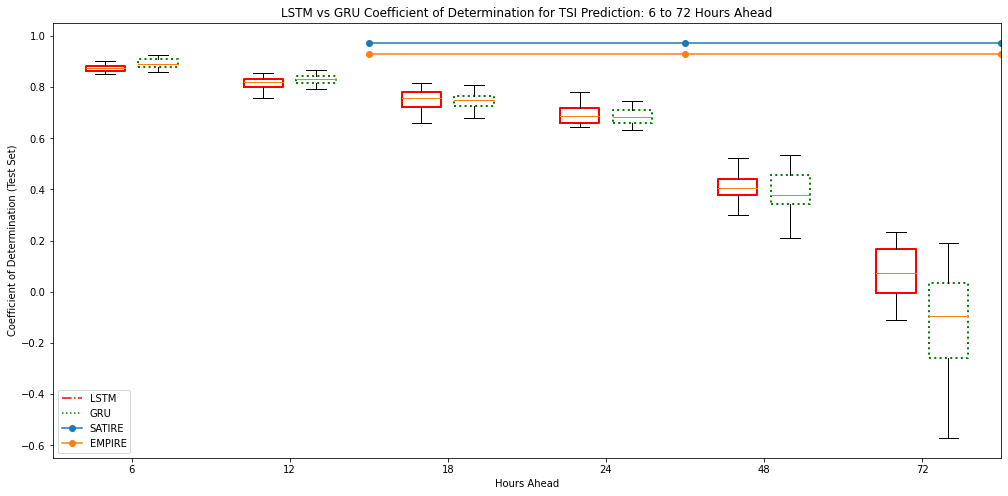

In [30]:
a = 1 #first boxplot initial position
b = 2
n_groups = 6
# building base plot with: 17x8
fig, ax = plt.subplots(figsize=(17, 8)) 
#fig, ax = plt.subplots() 

for i in range(n_groups):
    g1 = df_lstm[intervals[i]:intervals[i]+n_tests, 1] #values for the i-th group 
    g2 = df_gru[intervals[i]:intervals[i]+n_tests, 1] #values for the i-th group 

    boxes = plt.boxplot([g1,g2], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    
    # increment positions of plots
    a = b+2
    b = a+1

plt.plot([], c=colors[0], label='LSTM', linestyle='-.')
plt.plot([], c=colors[1], label='GRU', linestyle=':')

plt.legend()

plt.xticks(np.arange(1.5, n_groups*3, 3),groups) # repositioning labels batchsize
plt.xlim(0,n_groups*3)
plt.xlabel('Hours Ahead')
plt.ylabel('Coefficient of Determination (Test Set)')
plt.title('LSTM vs GRU Coefficient of Determination for TSI Prediction: 6 to 72 Hours Ahead')
plt.savefig('box10.png', dpi=70, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

SR = np.zeros((n_groups)) 
for i in range(n_groups):
    SR[i] = S3R
plt.plot(groups,SR,'o-', label='SATIRE')

ER = np.zeros((n_groups)) 
for i in range(n_groups):
    ER[i] = E3R
plt.plot(groups,ER,'o-', label='EMPIRE')

plt.legend()
plt.show()

In [31]:
groups[:4]

[6, 12, 18, 24]

IndexError: range object index out of range

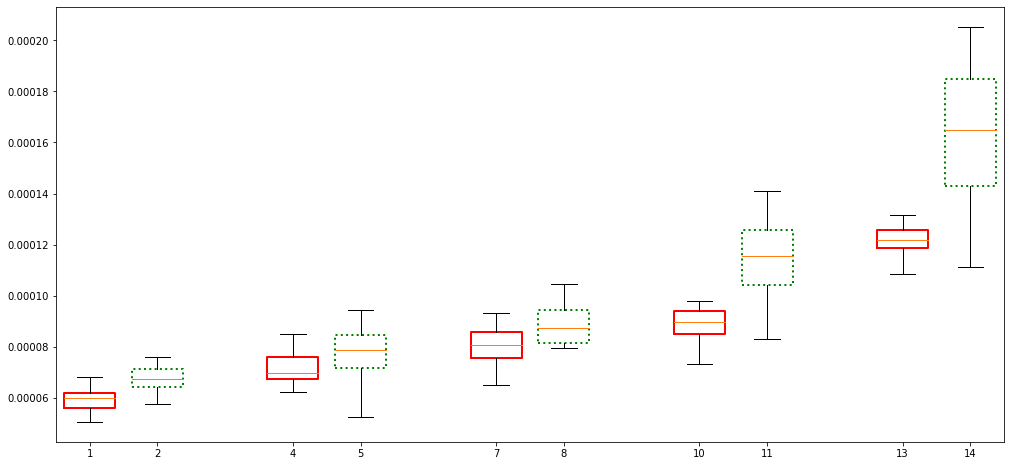

In [13]:
a = 1 #first boxplot initial position
b = 2
n_groups = 6
# building base plot with: 17x8
fig, ax = plt.subplots(figsize=(17, 8)) 
#fig, ax = plt.subplots() 

for i in range(n_groups):
    g1 = df_lstm[intervals[i]:intervals[i]+n_tests, 4] #values for the i-th group 
    g2 = df_gru[intervals[i]:intervals[i]+n_tests, 4] #values for the i-th group 

    boxes = plt.boxplot([g1,g2], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    
    # increment positions of plots
    a = b+2
    b = a+1

plt.plot([], c=colors[0], label='LSTM', linestyle='-.')
plt.plot([], c=colors[1], label='GRU', linestyle=':')

plt.legend()

plt.xticks(np.arange(1.5, n_groups*3, 3),groups) # repositioning labels batchsize
plt.xlim(0,n_groups*3)
plt.xlabel('Hours Ahead of Prediction')
plt.ylabel('Mean Absolute Percentage Error (Test Loss)')
plt.title('LSTM vs GRU Mean Absolute Percentage Error for TSI Prediction: 6 to 72 Hours Ahead')
plt.savefig('box10.png', dpi=70, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

SR = np.zeros((n_groups)) 
for i in range(n_groups):
    SR[i] = S3R
# plt.plot(groups[:4],SR,'o-', label='SATIRE')

ER = np.zeros((n_groups)) 
for i in range(n_groups):
    ER[i] = E3R
# plt.plot(groups[:4],ER,'o-', label='EMPIRE')

plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

n_tests = 20 #number of tests for each setting
n_groups = int(df_gru.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = [6,12,18,24,48,72] # Each group label
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN
labels = groups

a = 1 #first boxplot initial position
b = 2

# building base plot with: 17x8
#fig, ax = plt.subplots(figsize=(10, 8)) 
#fig, ax = plt.subplots() 

plot_opts={'cutoff_val':5, 'cutoff_type':'abs', 'label_fontsize':'small',
           'label_rotation':30, 'violin_fc':(0.8, 0.8, 0.8),
           'jitter_marker':'.', 'jitter_marker_size':3, 'bean_color':'#FF6F00',
           'bean_mean_color':'#009D91'}

g1 = df_lstm[intervals[0]:intervals[0]+n_tests, 3] 
g2 = df_gru[intervals[0]:intervals[0]+n_tests, 3] 

for i in range(1,n_groups):
    g1 = np.c_[g1,df_121_6_lstm[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 
    g2 = np.c_[g2,df_121_6_gru[intervals[i]:intervals[i]+n_tests, 3]] #values for the i-th group 

lstm_data = pd.DataFrame(g1, columns = ['1_Day','2_Days','3_Days'])
gru_data = pd.DataFrame(g2, columns = ['1_Day','2_Days','3_Days'])
gru = [gru_data.iloc[:, i] for  i in range(gru_data.shape[-1])]
lstm = [lstm_data.iloc[:, i] for  i in range(lstm_data.shape[-1])]